In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror{font-family:Consolas; font-size:15pt;}
div.output{font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt{min-width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format= 'retina' # 그래프를 선명하게 
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게


<font size="5" color="red">ch12 데이터 시각화</font>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함되어 있음
    * seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능과 groupby 기능 포함된 라이브러리
    
# 2절 seaborn
- 공식사이트 : https://seaborn.pydata.org
- seaborn API : https://seaborn.pydata.org/api.html

- seaborn으로 그래프 그리기 위해다음 단계 따릅니다
    1. 데이터 준비
    2. 미적 속성 설정(한글설정을 다시)
    3. 함수를 이용하여 그래프 그리기(수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)
    4. 그래프 출력(show), 저장(savefig)

## 2.1 데이터 준비하기
- iris, titanic

In [5]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [10]:
iris['species'].value_counts() # 범주별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [11]:
titanic = sns.load_dataset('titanic')
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
titanic.shape

(891, 15)

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [14]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기(style, context, palette, figsize...)
### 1) 그래프 style 설정
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (교안 51page)
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안 20page)

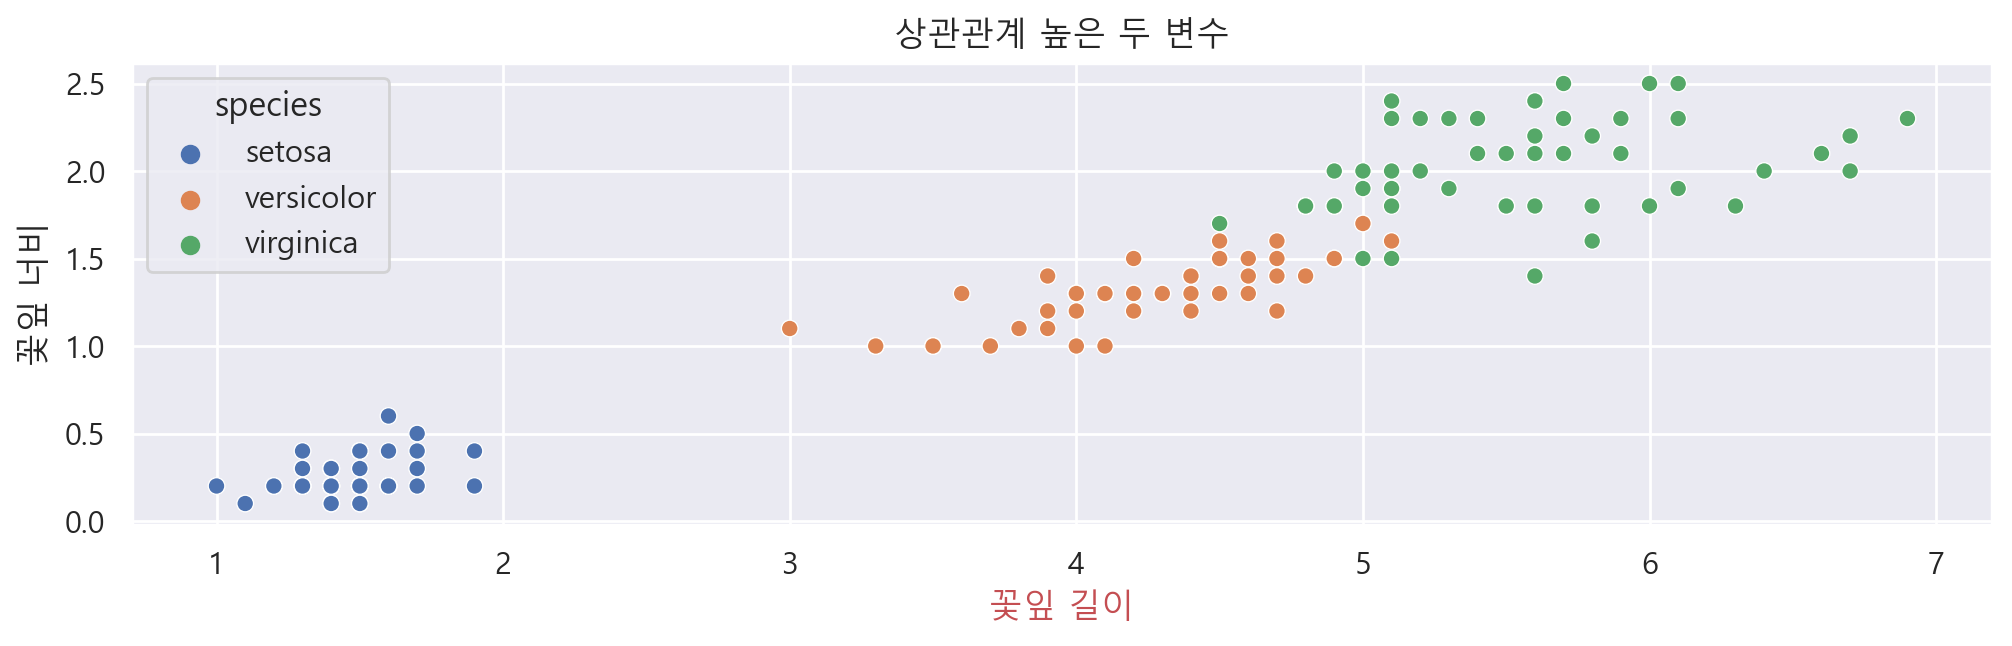

In [22]:
plt.figure(figsize=(12, 3))
sns.set(style='darkgrid') # white, whitegrid, dark, darkgrid, ticks
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
ax.set(title='상관관계 높은 두 변수',
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')
plt.show()

### 2) 컨텍스트 지정(비율)

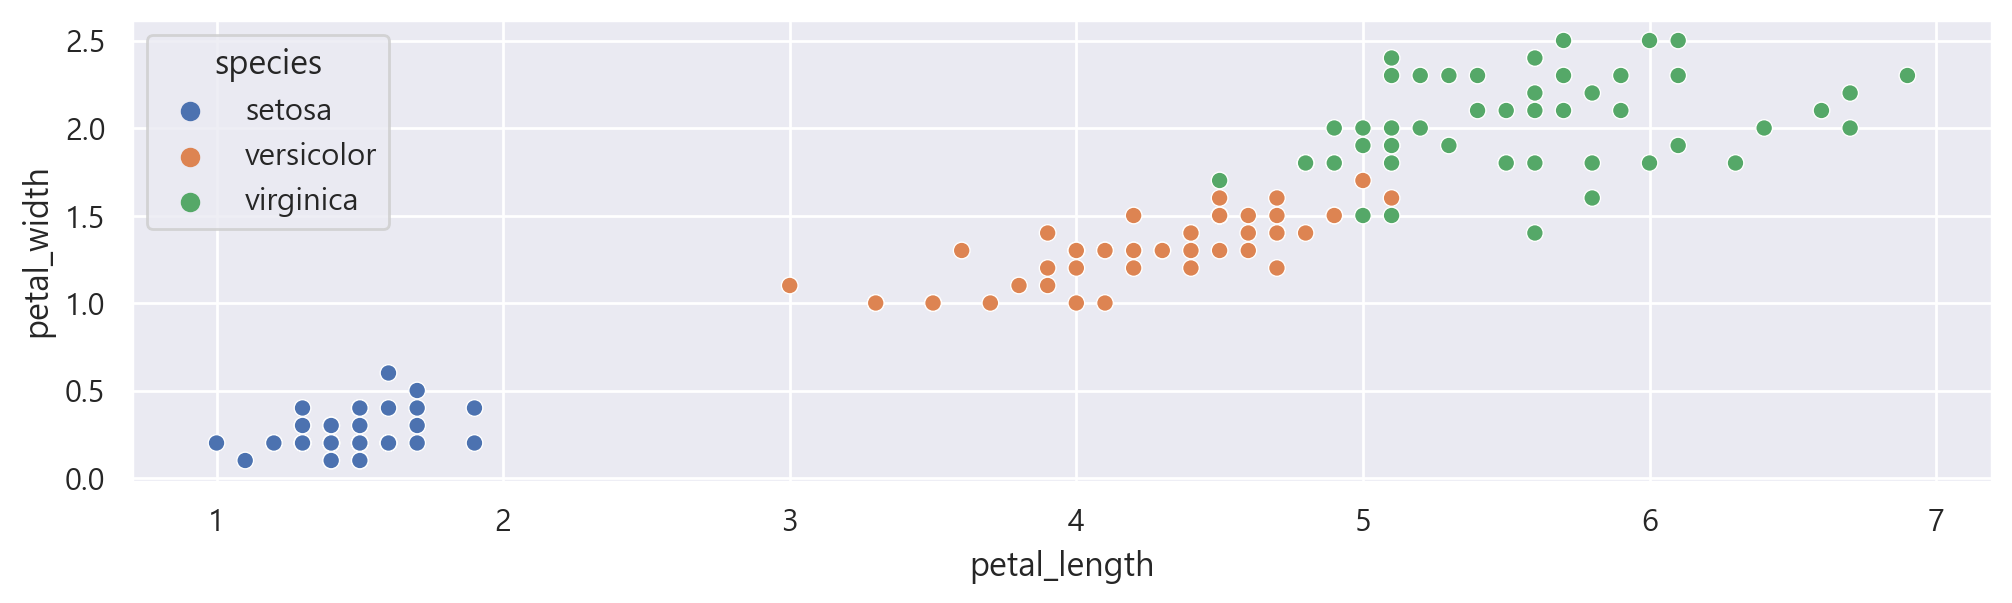

In [24]:
plt.figure(figsize=(12, 3))
# sns.set(context='notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)
sns.set_context('notebook')
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 3) 컬러 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

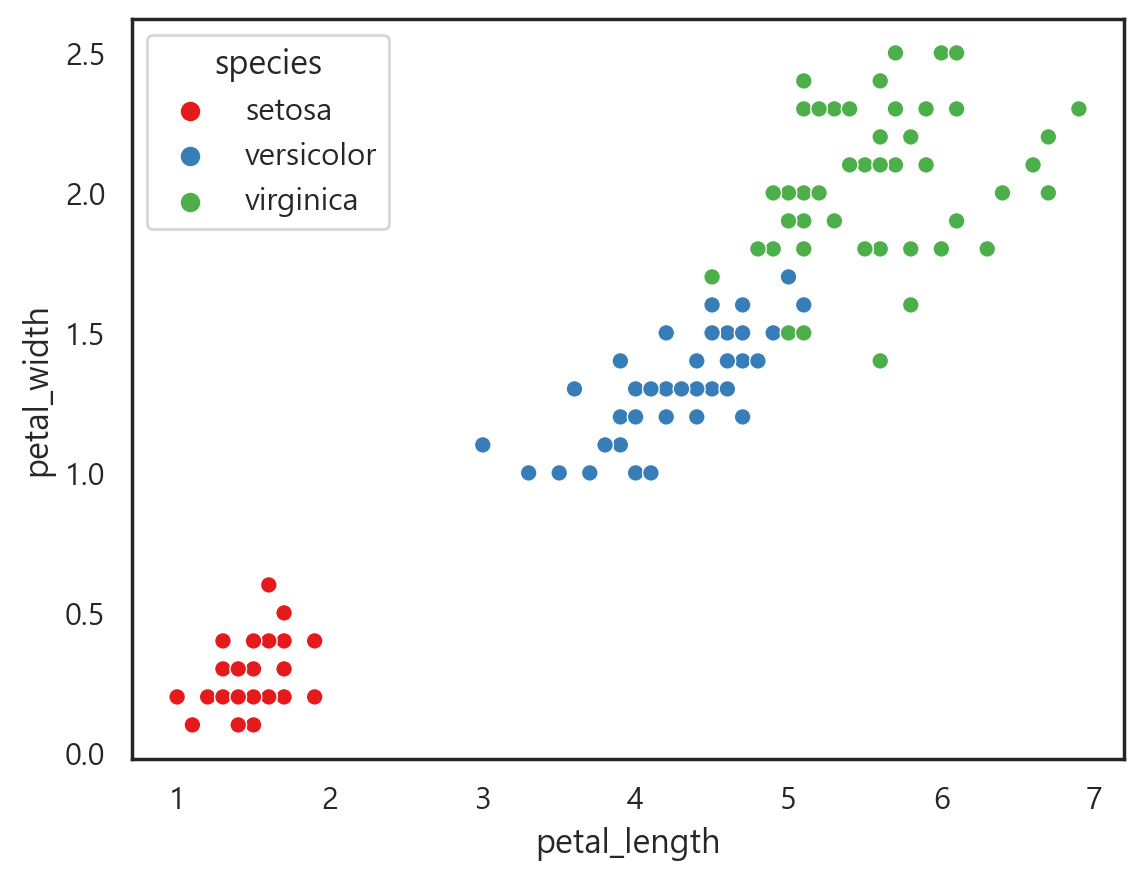

In [29]:
sns.set(palette='Pastel1', style='white', context='notebook') # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
sns.scatterplot(data=iris, x='petal_length', y='petal_width',
                hue='species', palette='Set1')
ax.set_title('붓꽃 데이터')
plt.show()

In [30]:
sns.set(palette='Dark2',
        style='whitegrid',
        context='notebook',
        rc={'figure.figsize':(10, 3)}) # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

## 2.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
    - x축이 수치형 데이터
   (ex) scatterplot, lineplot => relplot(서브플롯)

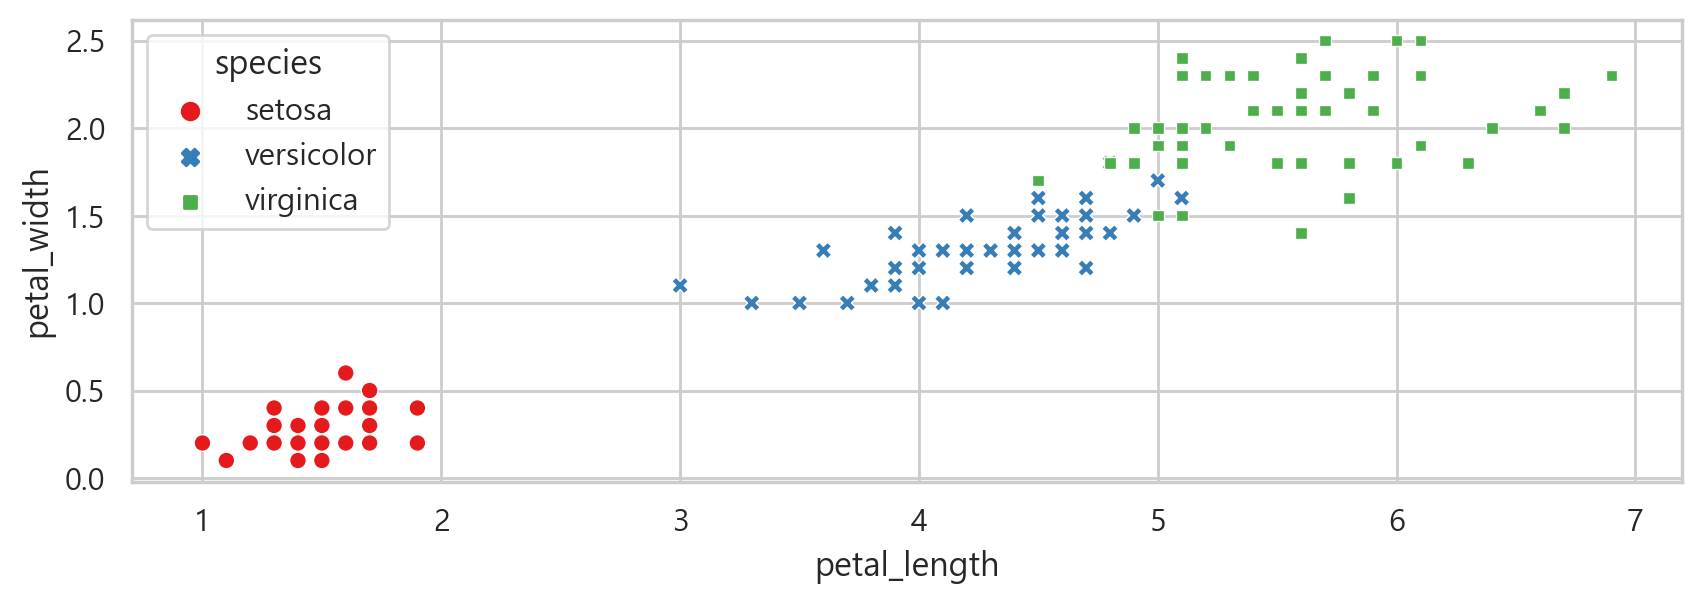

In [34]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
                palette='Set1', style='species')
        # species별 색상과 스타일이 다른 scatterplot
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

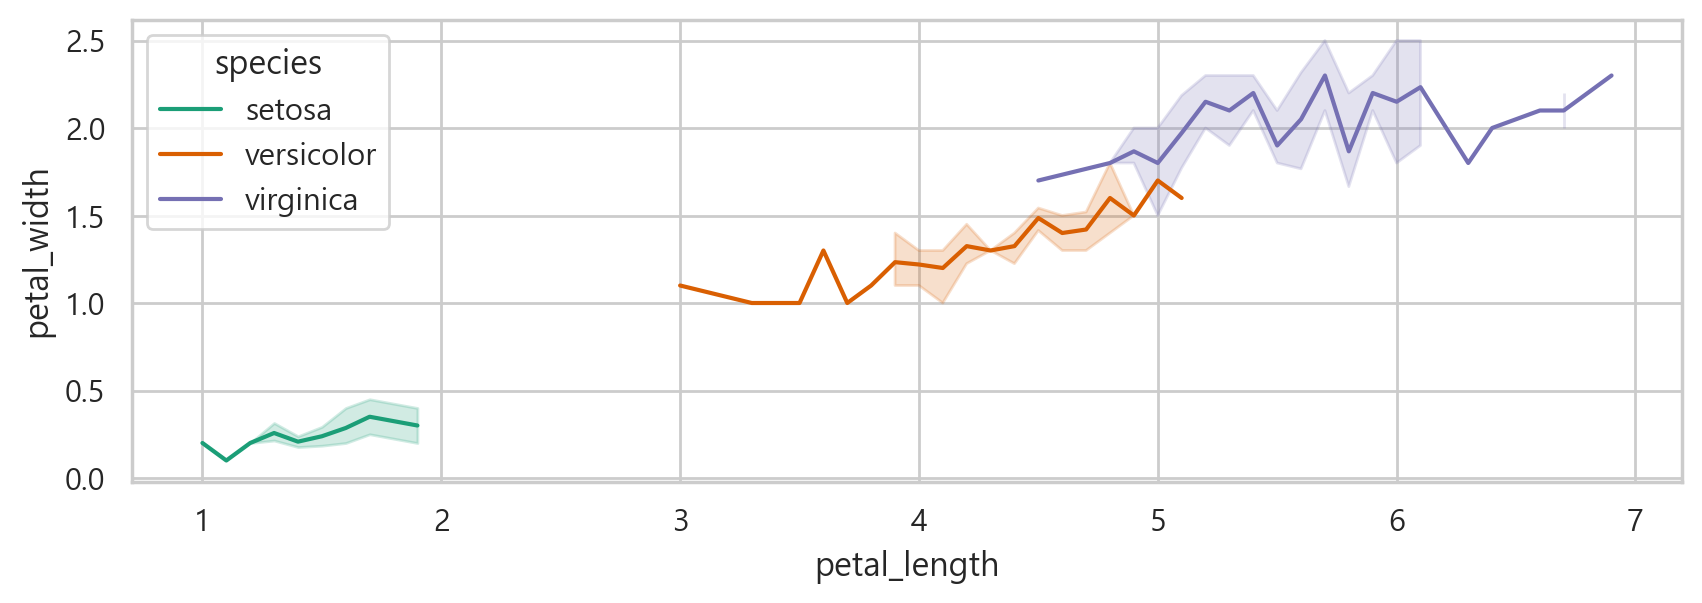

In [36]:
# 종별 lineplot
# lineplot의 음영 : 95%신뢰구간
sns.lineplot(data=iris, x='petal_length', y='petal_width',
             hue='species')

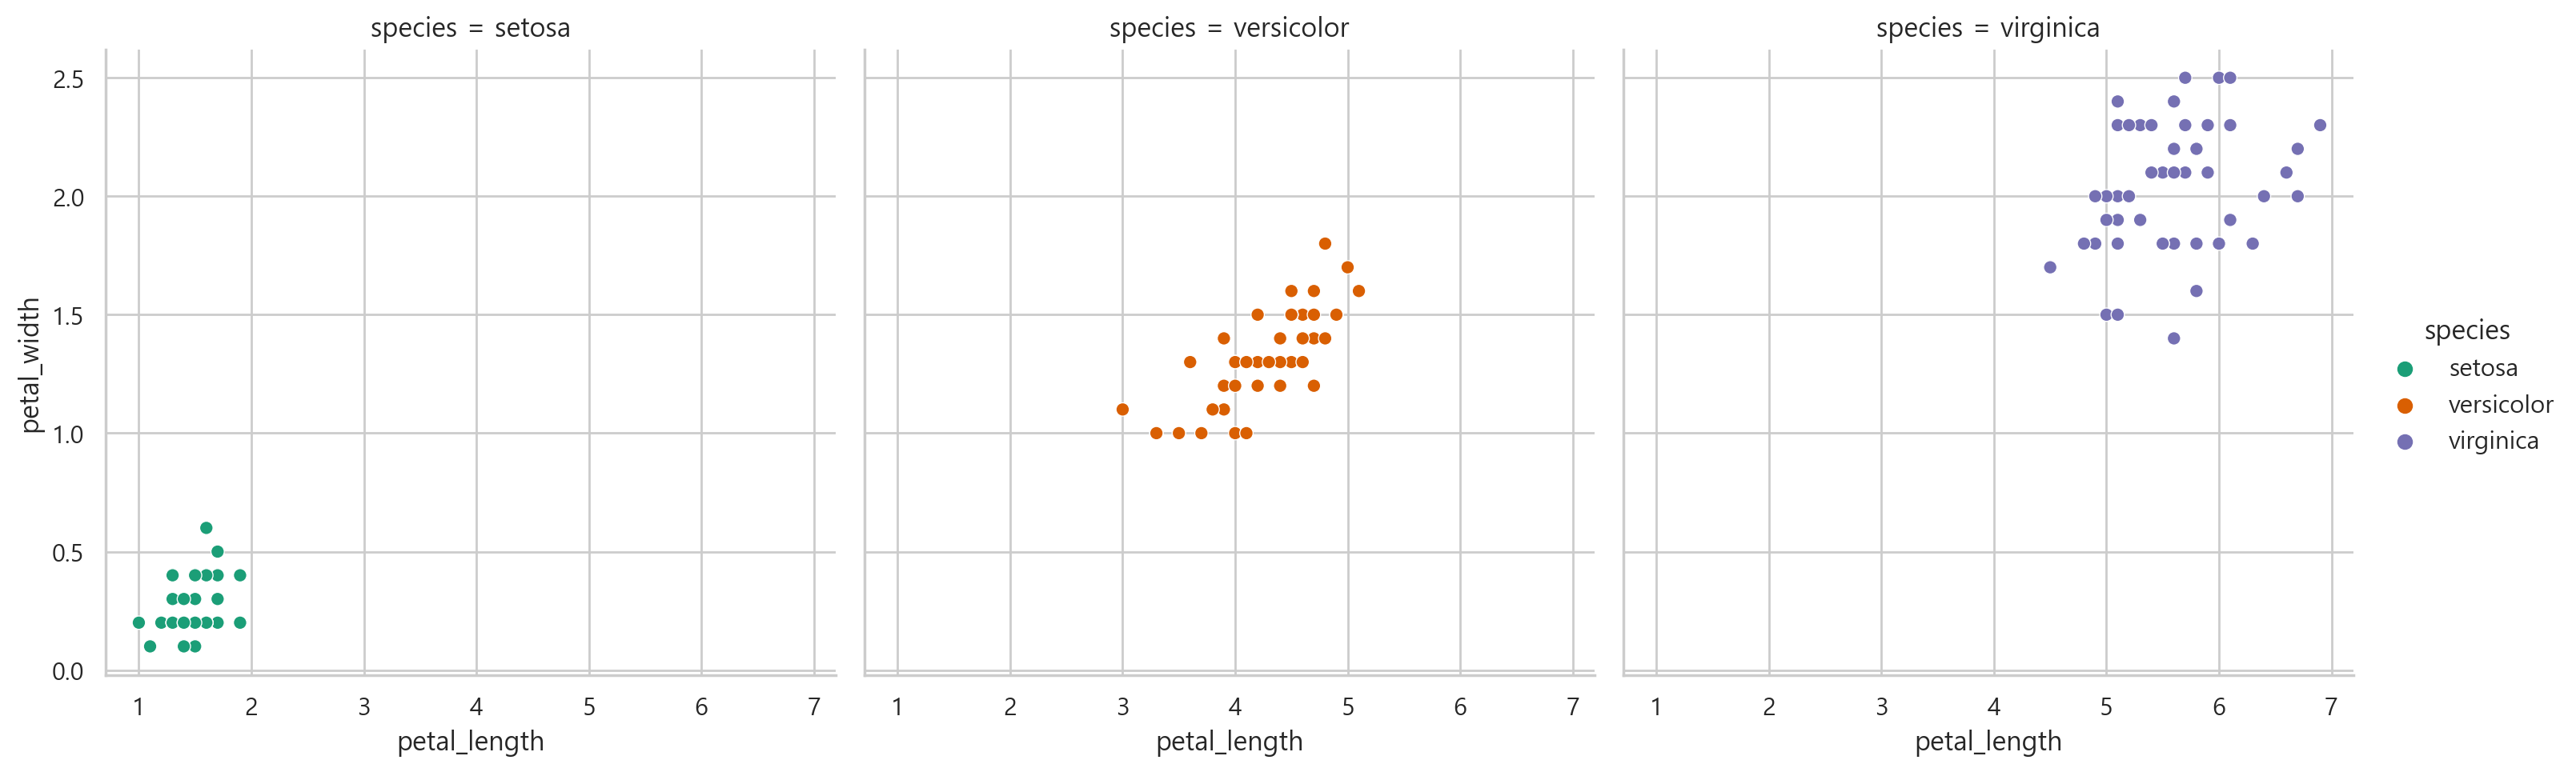

In [42]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue='species',
            # kind='line', # kind='scatter'가 기본값
            col='species', # species별 서브플롯
            # col_wrap=2, # 한줄에 표현될 서브플롯 수
           )
plt.show()

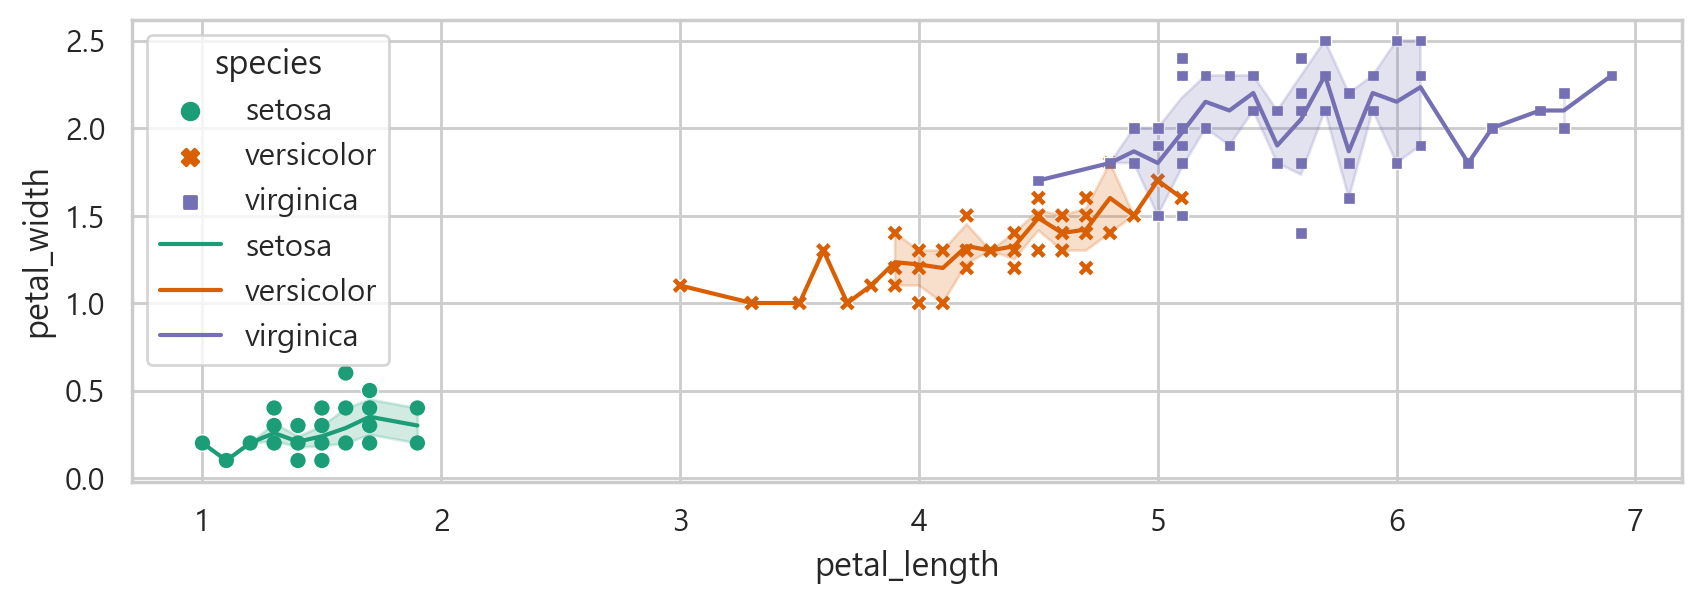

In [47]:
# scatter와 line을 겹쳐서
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
                style='species')
        # species별 색상과 스타일이 다른 scatterplot
sns.lineplot(data=iris, x='petal_length', y='petal_width',
             hue='species')
plt.show()

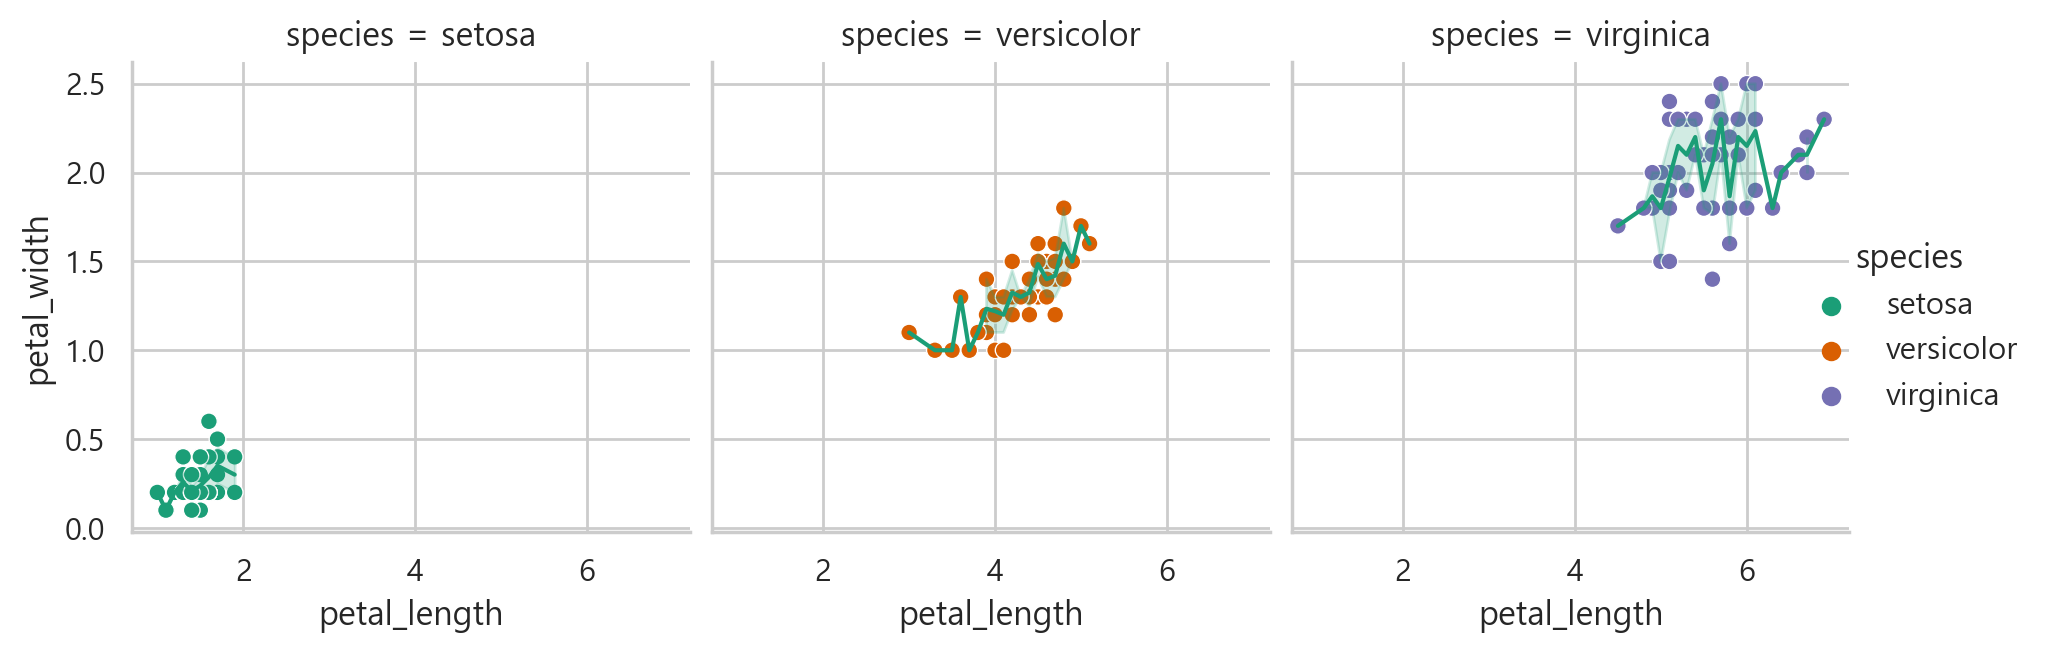

In [45]:
# line과 scatter를 종별 서브플롯으로 겹쳐서
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue='species',
            # kind='line', # kind='scatter'가 기본값
            col='species', # species별 서브플롯
            # col_wrap=2, # 한줄에 표현될 서브플롯 수
           )
# g그래프에 line플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
# 크기 조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize가 무시됨
g.fig.set_size_inches(10, 3)

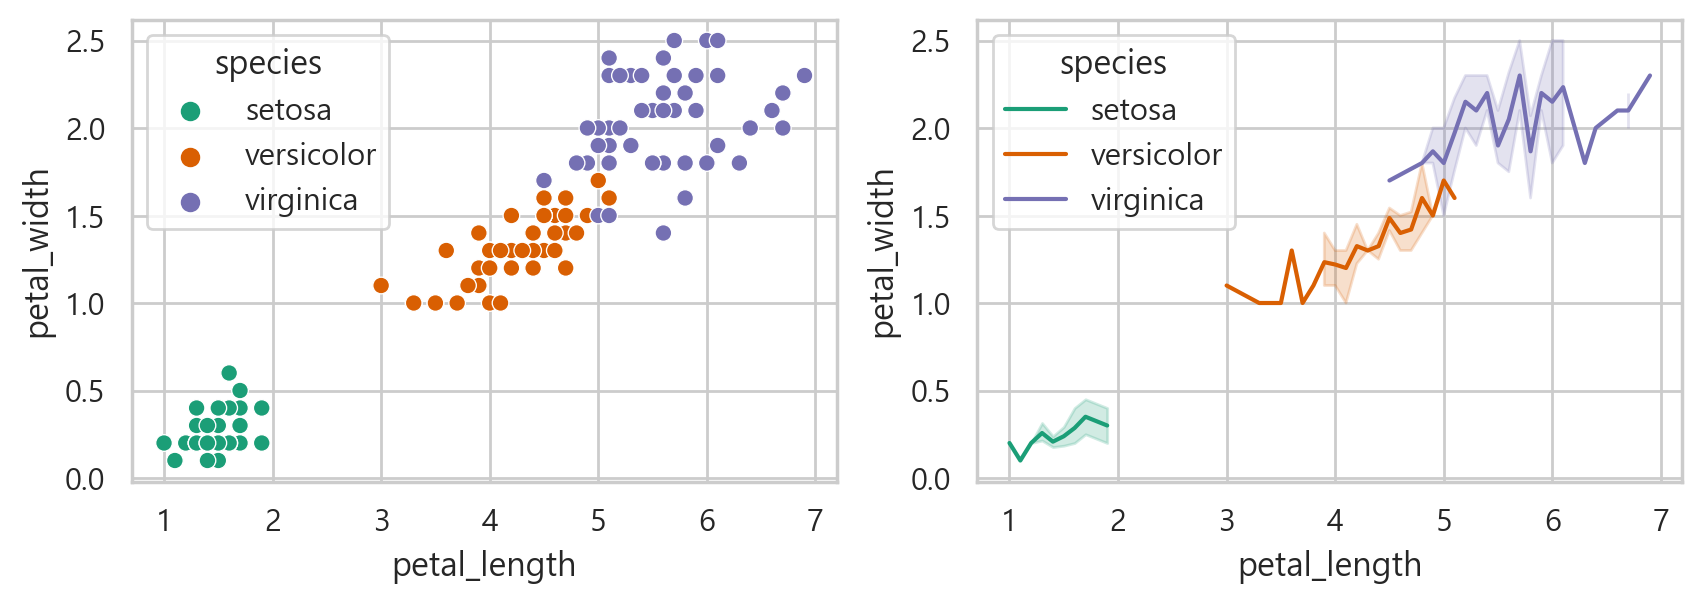

In [49]:
# ax[0]에서 scatter, ax[1]에는 lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species',
                ax=ax[0])
sns.lineplot(data=iris,
                x='petal_length',
                y='petal_width',
                hue='species',
                ax=ax[1])
plt.show()

### 2) 범주형 그래프
    - x축이 범주형 데이터
   (ex) stripplot(무작위로 흩뿌림), swarmplot(겹치지않는 산점도) <br>
        barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line)<br>
        countplot(count는 x의 빈도수가 높이)<br>
        boxplot, violinplot, boxenplot<br>
        => catplot(서브플롯)

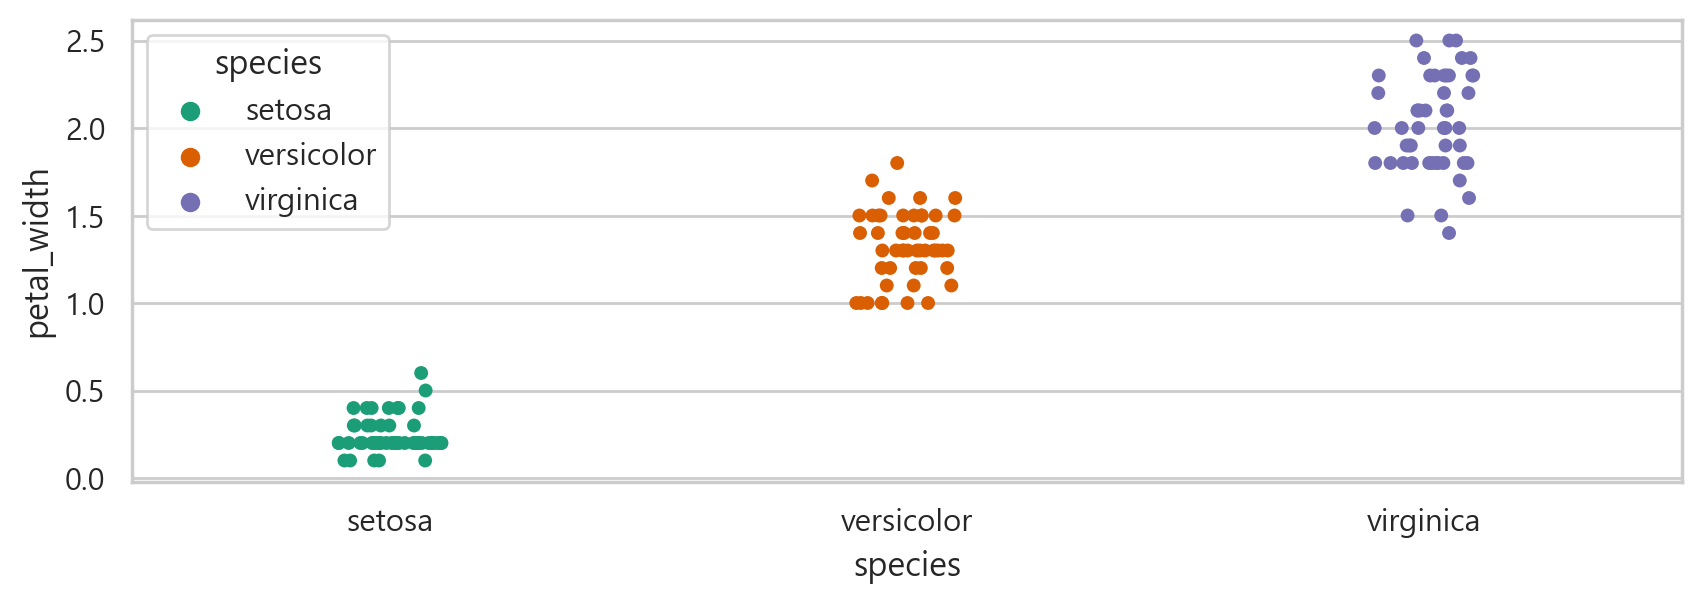

In [52]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

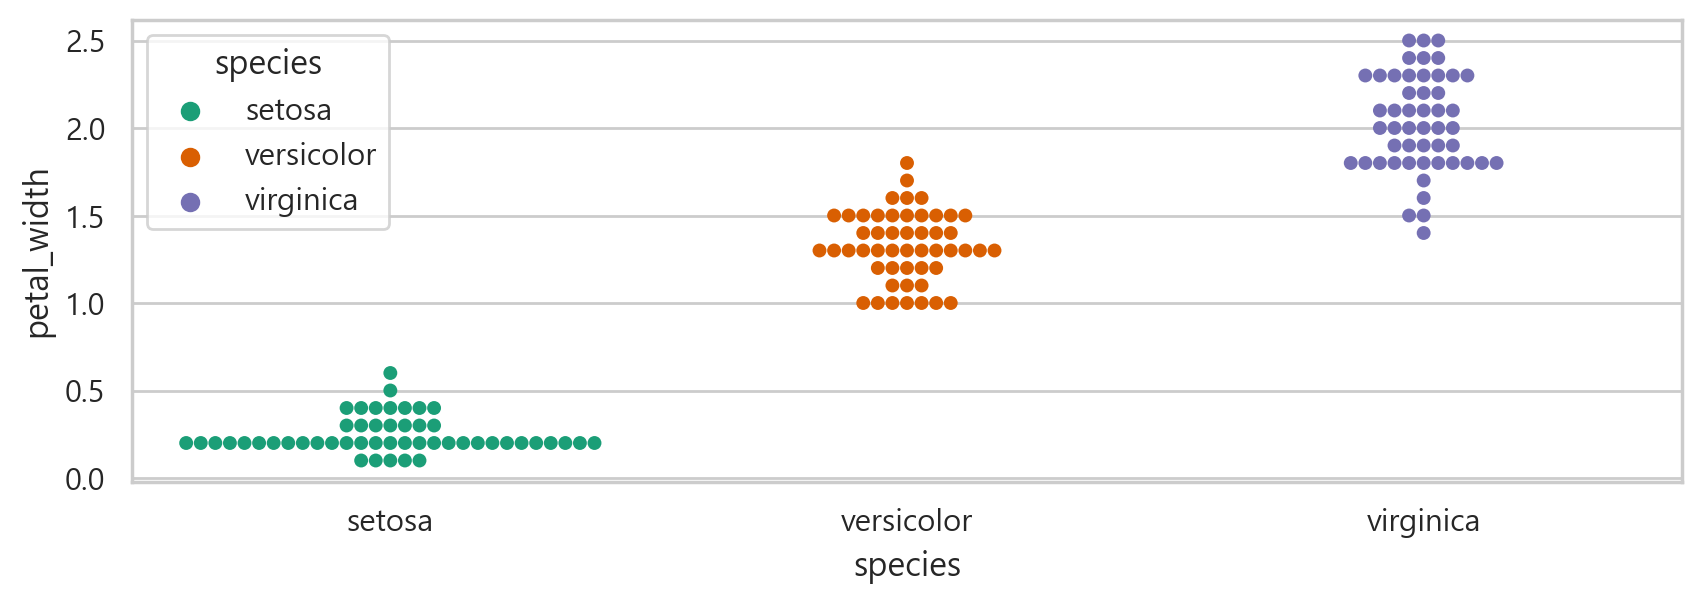

In [53]:
# x축이 범주형일 때의 산점도(분포 포함)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

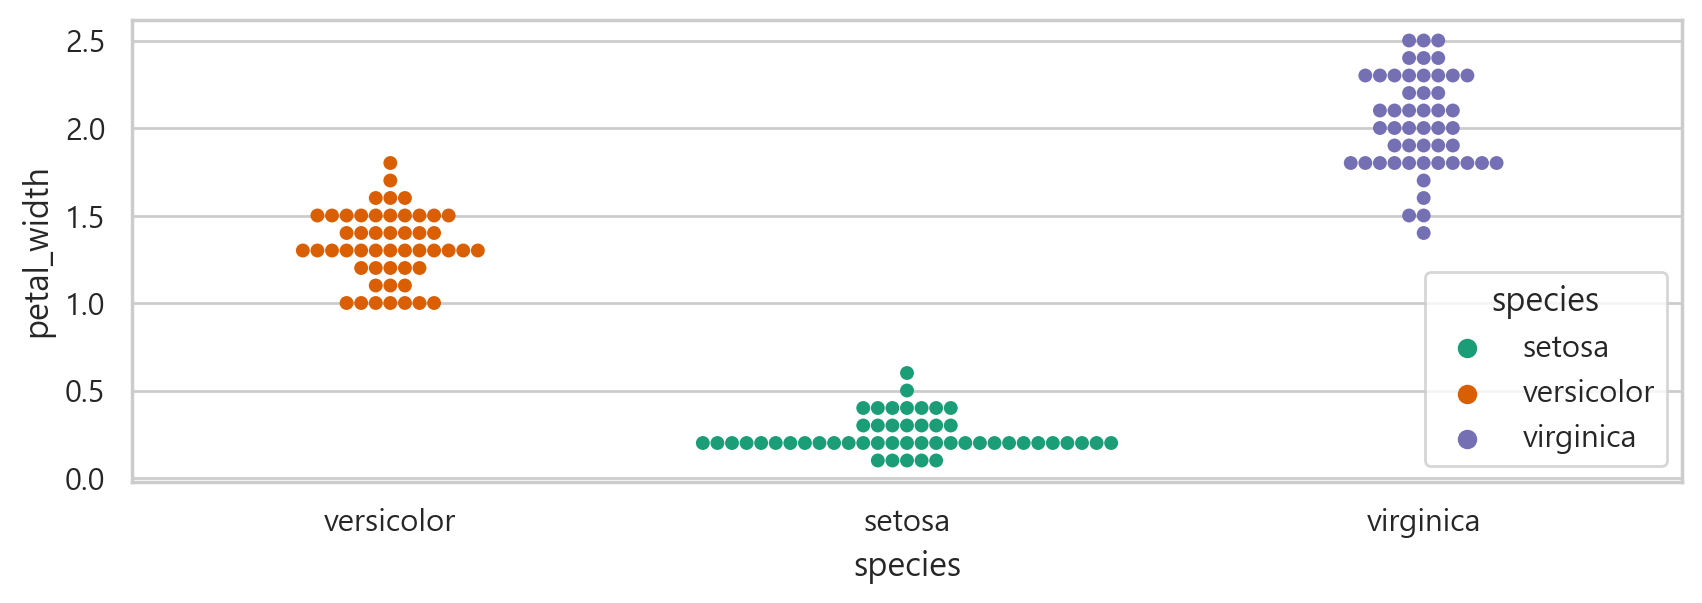

In [56]:
sns.swarmplot(data=iris,
              x='species',
              y='petal_width',
              hue='species',
              order=['versicolor', 'setosa', 'virginica'])
plt.show()

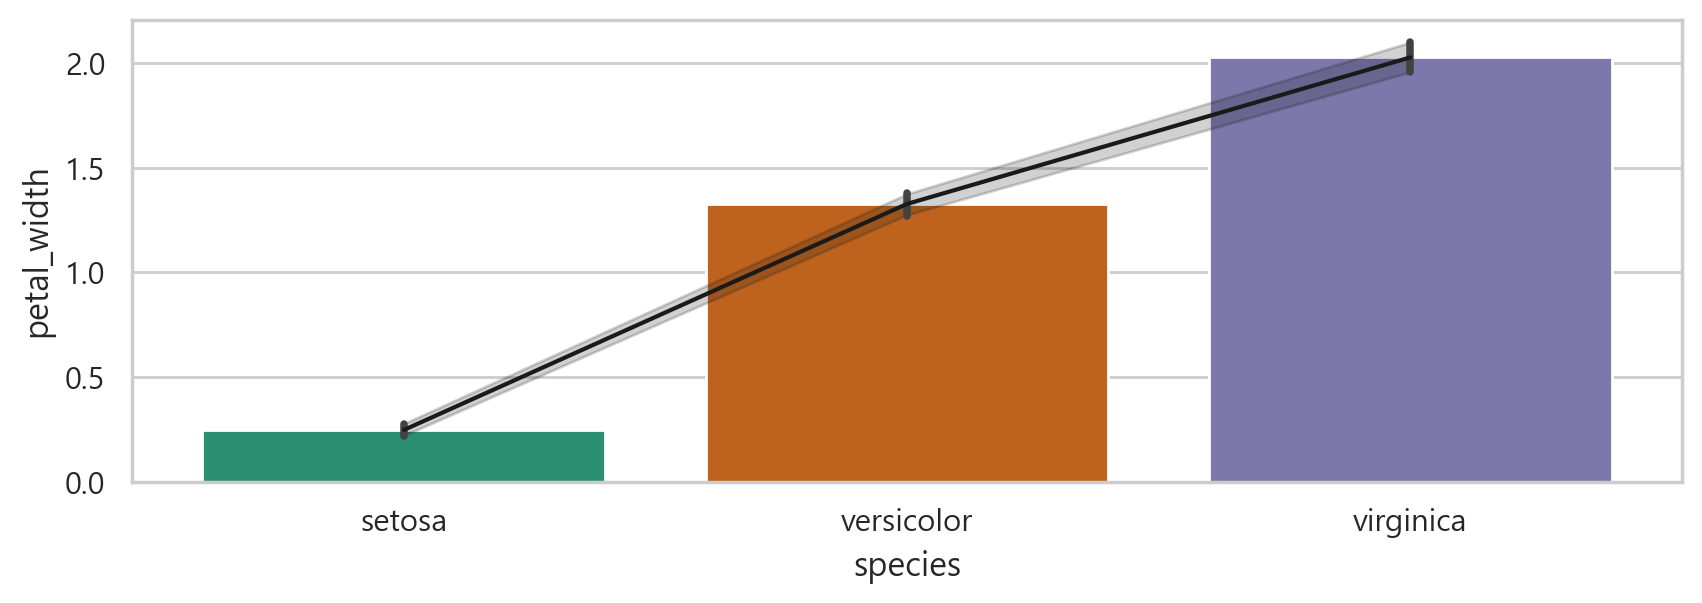

In [62]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
            # 신뢰구간 제외 : errorbar=None
sns.barplot(data=iris, x='species', y='petal_width',
            # errorbar=None
           )
sns.lineplot(data=iris, x='species', y='petal_width', color='k')
plt.show()

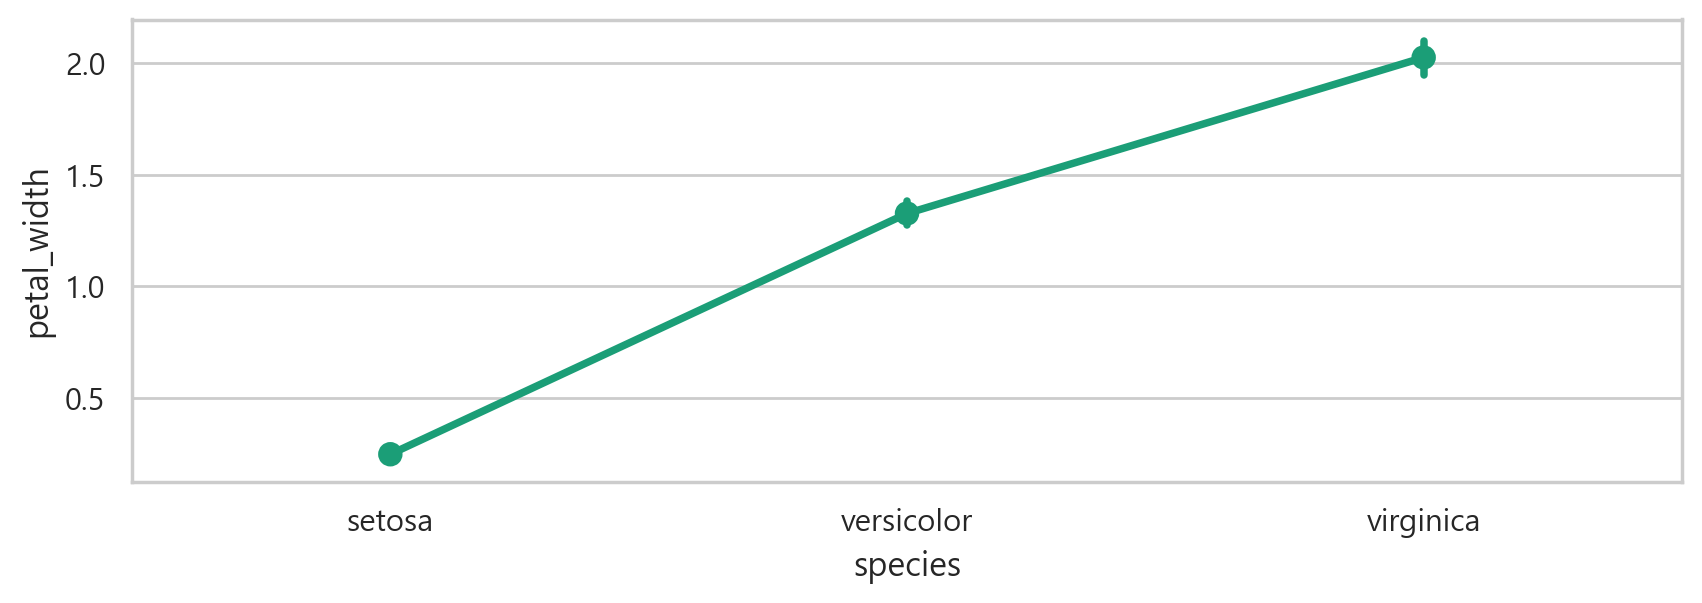

In [65]:
sns.pointplot(data=iris, x='species', y='petal_width') # 신뢰구간을 제외
plt.show()

In [68]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [70]:
titanic.dtypes.head(3)

survived     int64
pclass       int64
sex         object
dtype: object

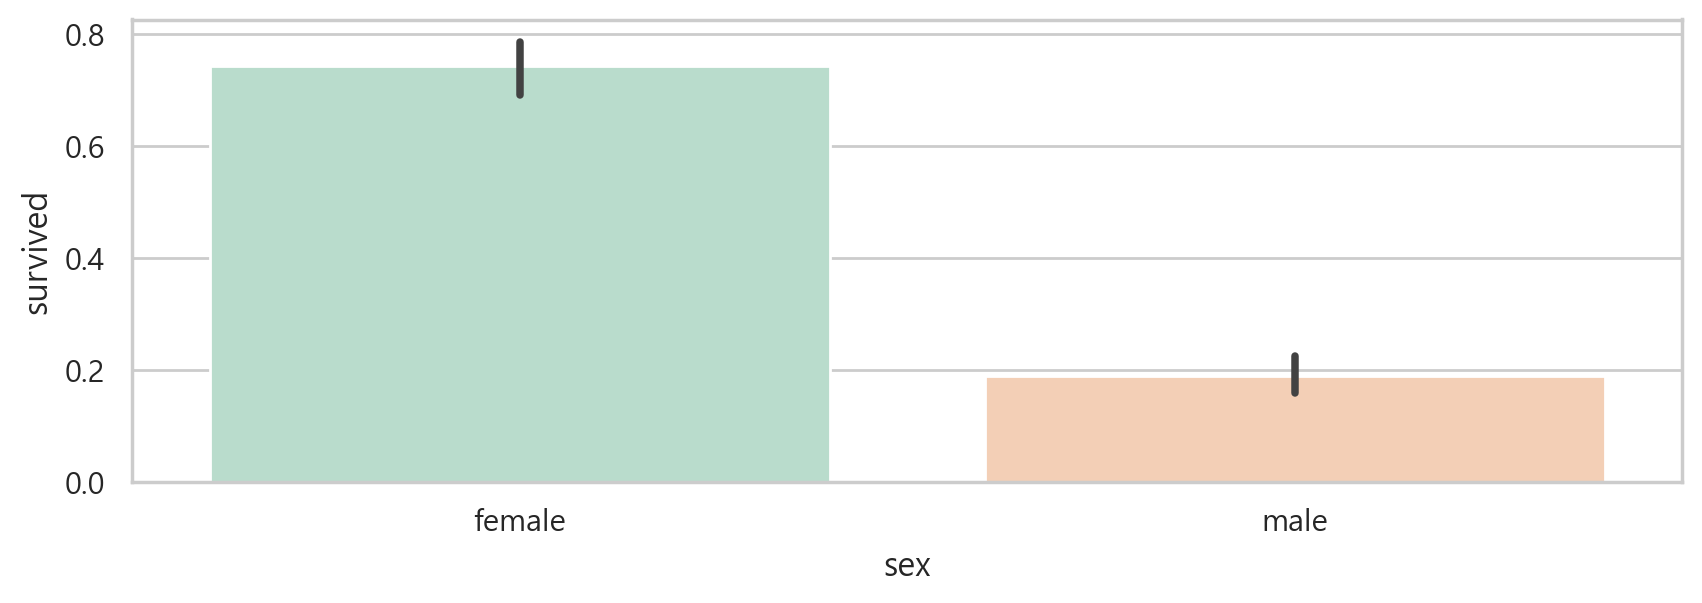

In [75]:
# 성별 생존율을 막대그래프
sns.barplot(data=titanic,
            x='sex',
            y='survived',
            order=['female', 'male'],
            palette='Pastel2')
plt.show()

In [77]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [79]:
# 남자(577) 중 비생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==0)])

468

In [80]:
# 남자(577) 중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1)])

109

In [81]:
# 여자(314) 중 비생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==0)])

81

In [82]:
# 여자(314) 중 생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1)])

233

In [83]:
titanic.sample(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
540,1,1,female,36.0,0,2,71.00,S,First,woman,False,B,Southampton,yes,False
654,0,3,female,18.0,0,0,6.75,Q,Third,woman,False,NaN,Queenstown,no,True


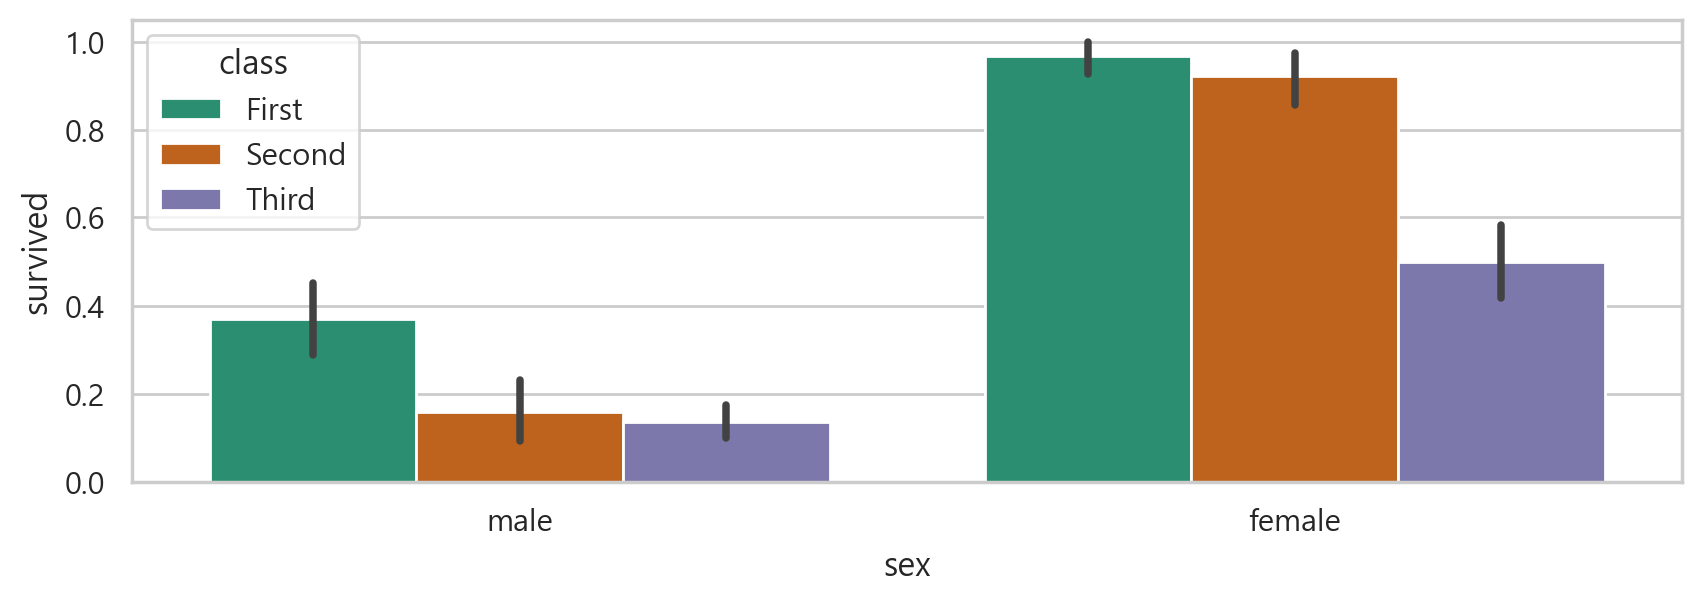

In [84]:
# 성별 생존율 hue='class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

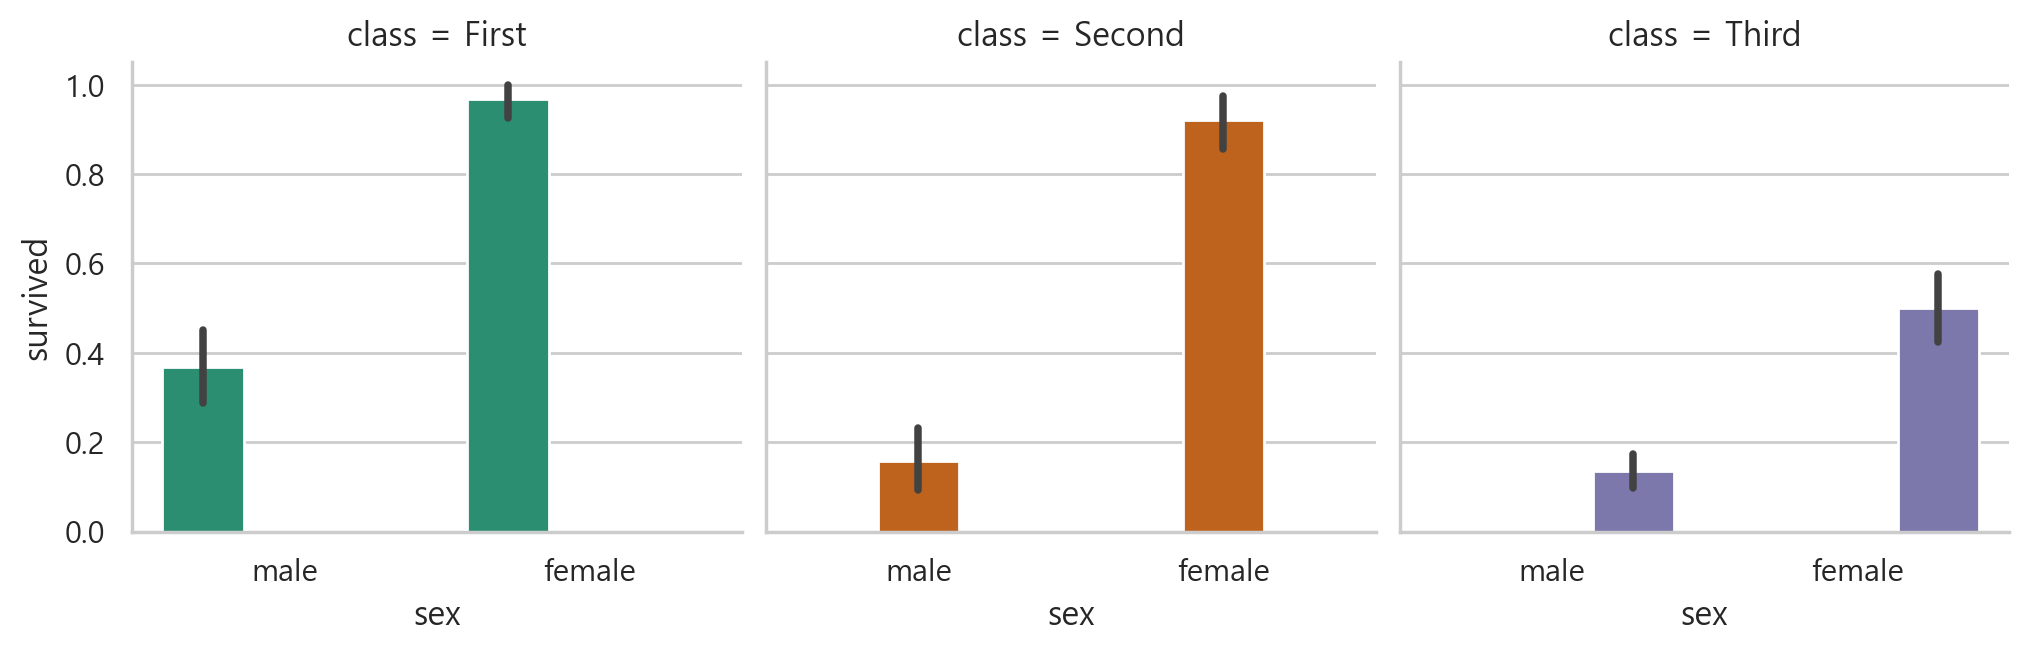

In [91]:
# class별로 성별생존률을 서브플롯(막대그래프)
g = sns.catplot(data=titanic,
            x='sex',
            y='survived',
            hue='class',
            kind='bar', # 기본값은 stripplot
            col='class',
            # col_wrap=2, # 한행에 그려질 서브플롯 갯수, 기본값은 n개
           )
g.fig.set_size_inches(10, 3)

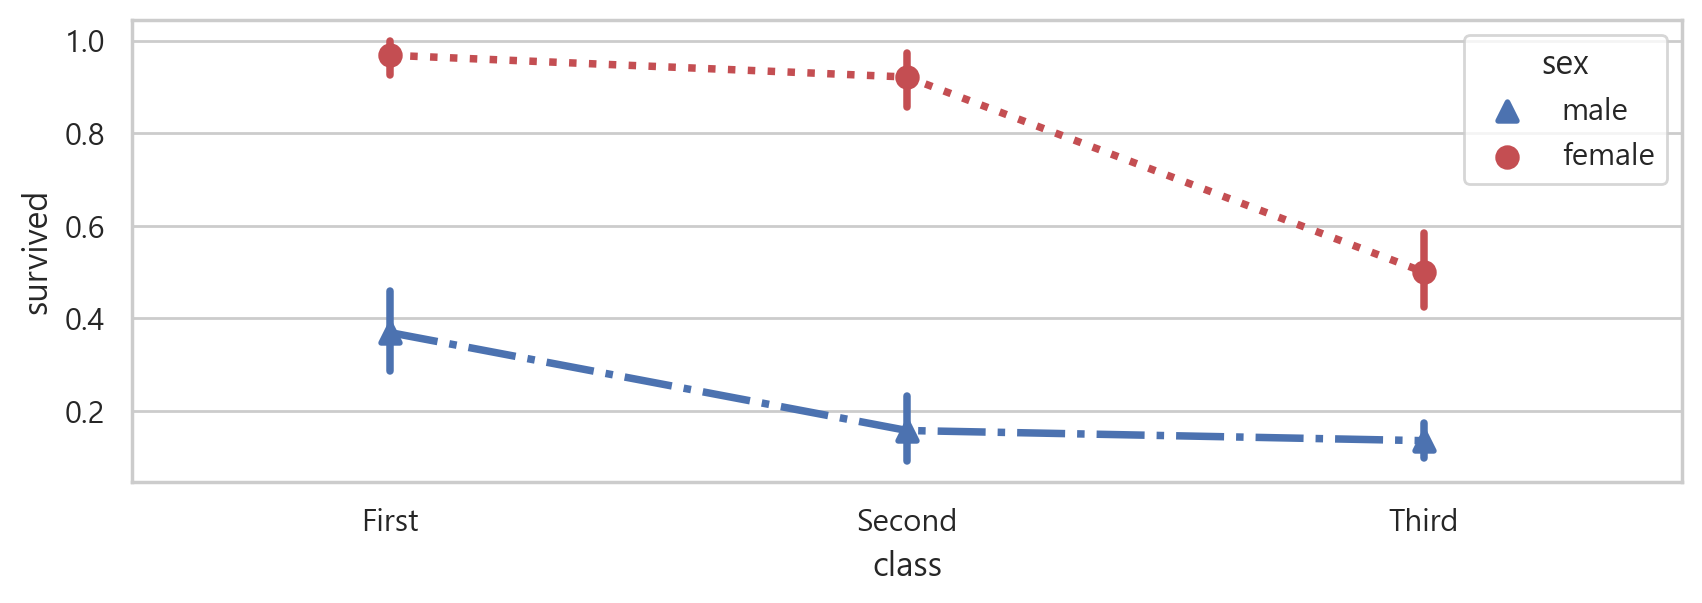

In [95]:
# 성별 생존율 hue='class'
sns.pointplot(data=titanic,
              x='class',
              y='survived',
              hue='sex',
              markers=['^', 'o'],
              linestyles=['-.', ':'],
              palette={'male':'b', 'female':'r'})
plt.show()

In [100]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen
print('전체 갯수 : {}, 결측치 갯수 : {}, 데이터 갯수 : {}'.format(totallen, nanlen, datalen))

전체 갯수 : 891, 결측치 갯수 : 688, 데이터 갯수 : 203


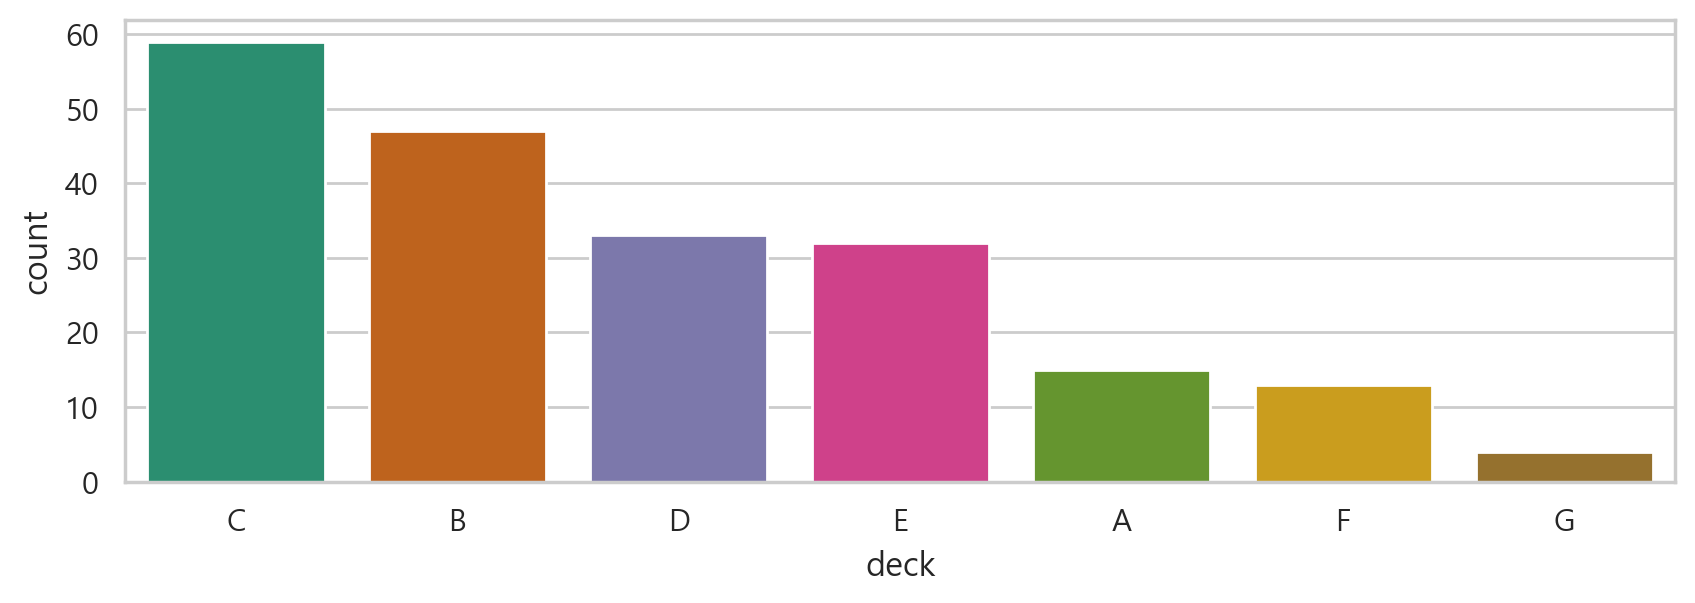

In [107]:
# deck별 갯수를 막대그래프(countplot)
sns.countplot(data=titanic,
              x='deck',
              # order=['C','B','D','E','A','F','G']
              order = deckcnt.index
             )
plt.show()

In [106]:
deckcnt = titanic.deck.value_counts() # 범주별 데이터 갯수(정렬 포함)
deckcnt # deckcnt.index가 큰순

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

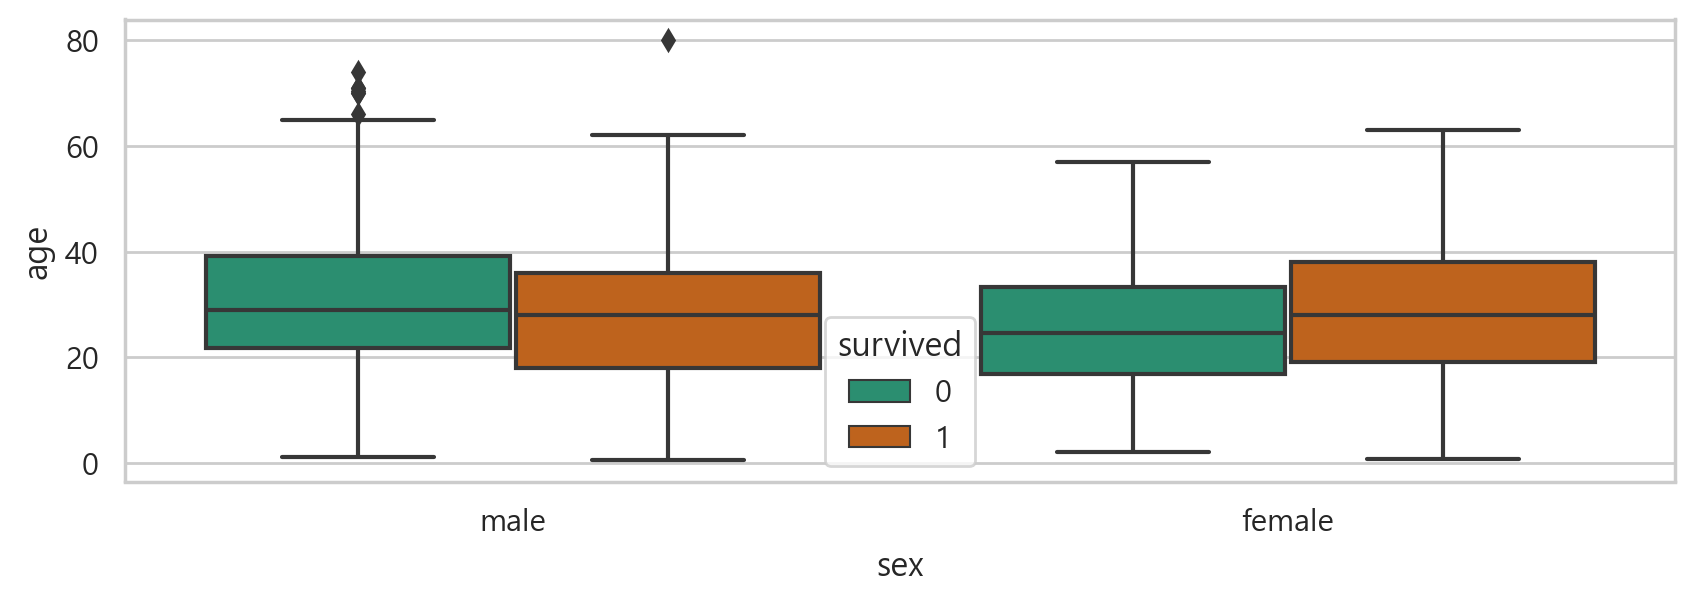

In [112]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

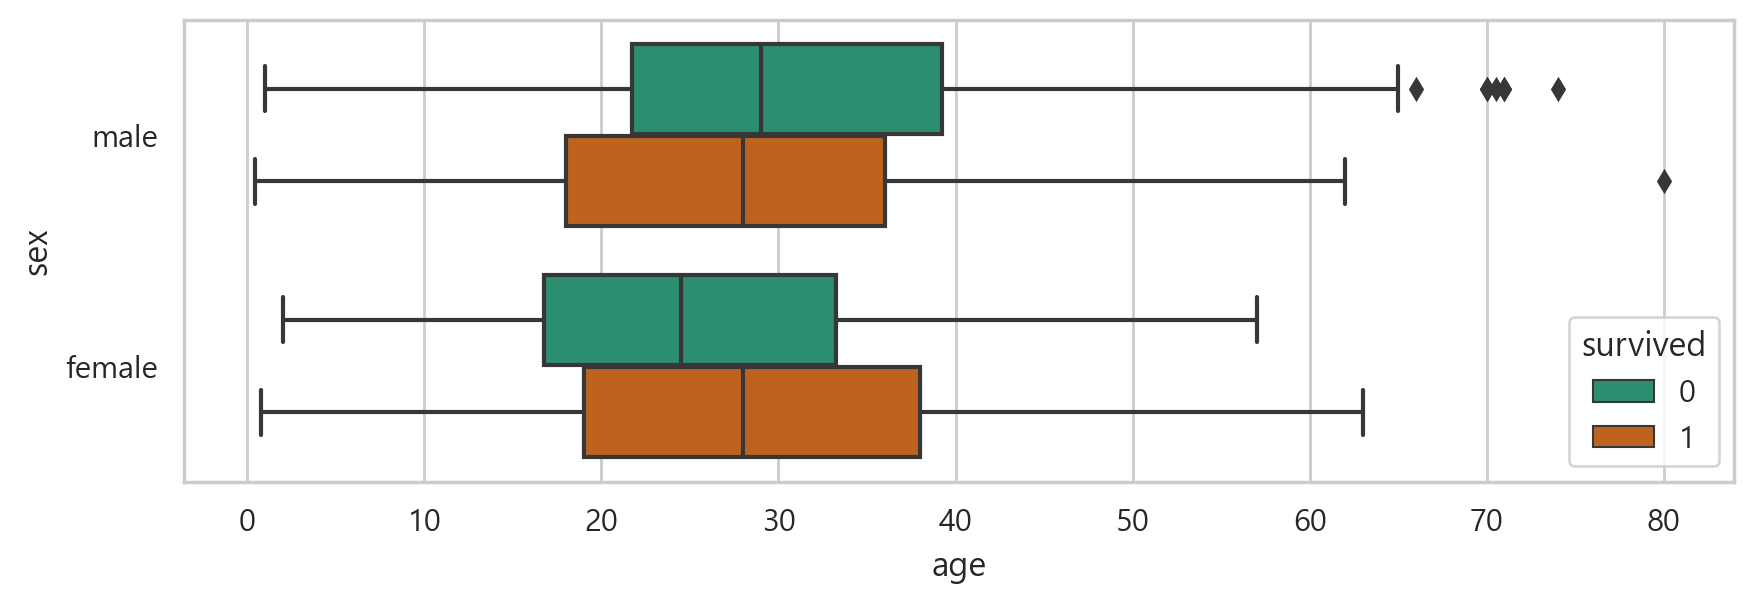

In [113]:
sns.boxplot(data=titanic, y='sex', x='age', hue='survived')
plt.show()

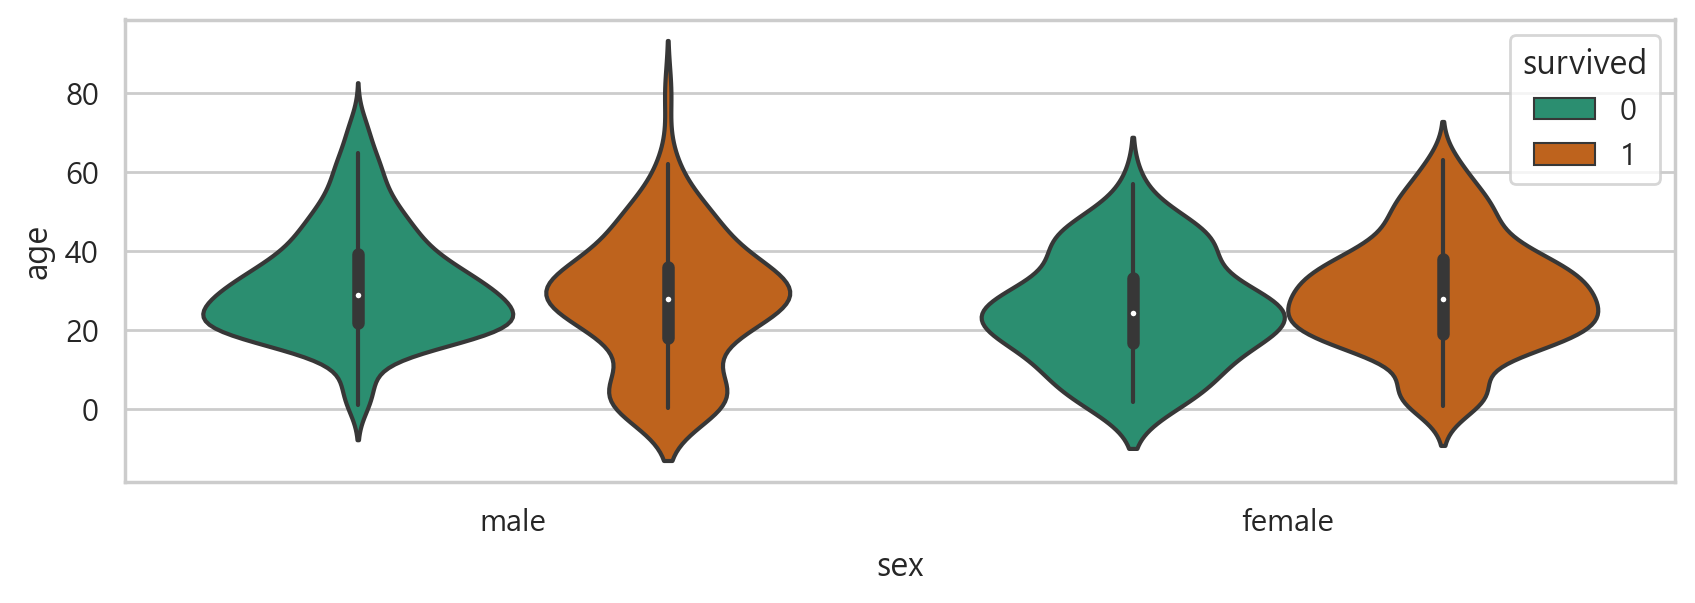

In [114]:
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

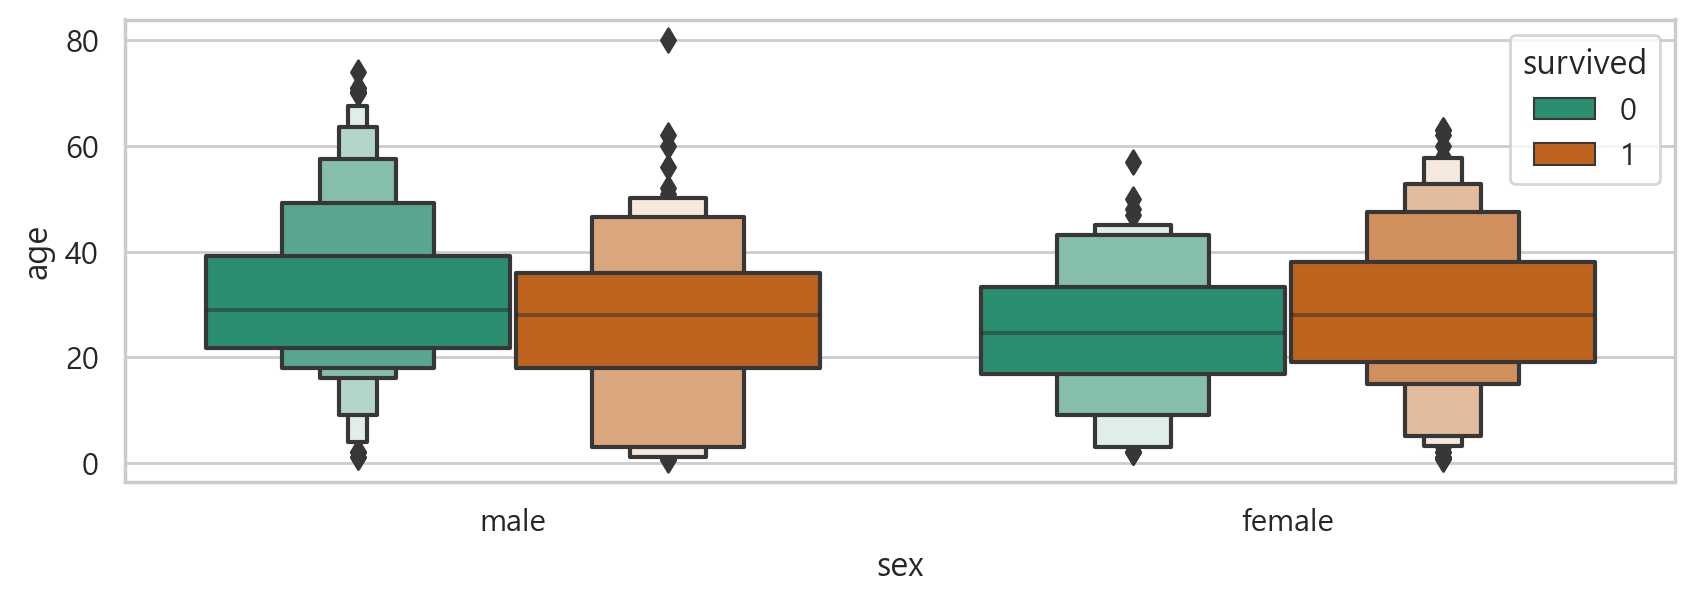

In [115]:
# boxenplot : box플롯 + 분포
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')
plt.show()

### 3) 쌍관계 그래프
- pairplot : 데이터 프레임에 포함된 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

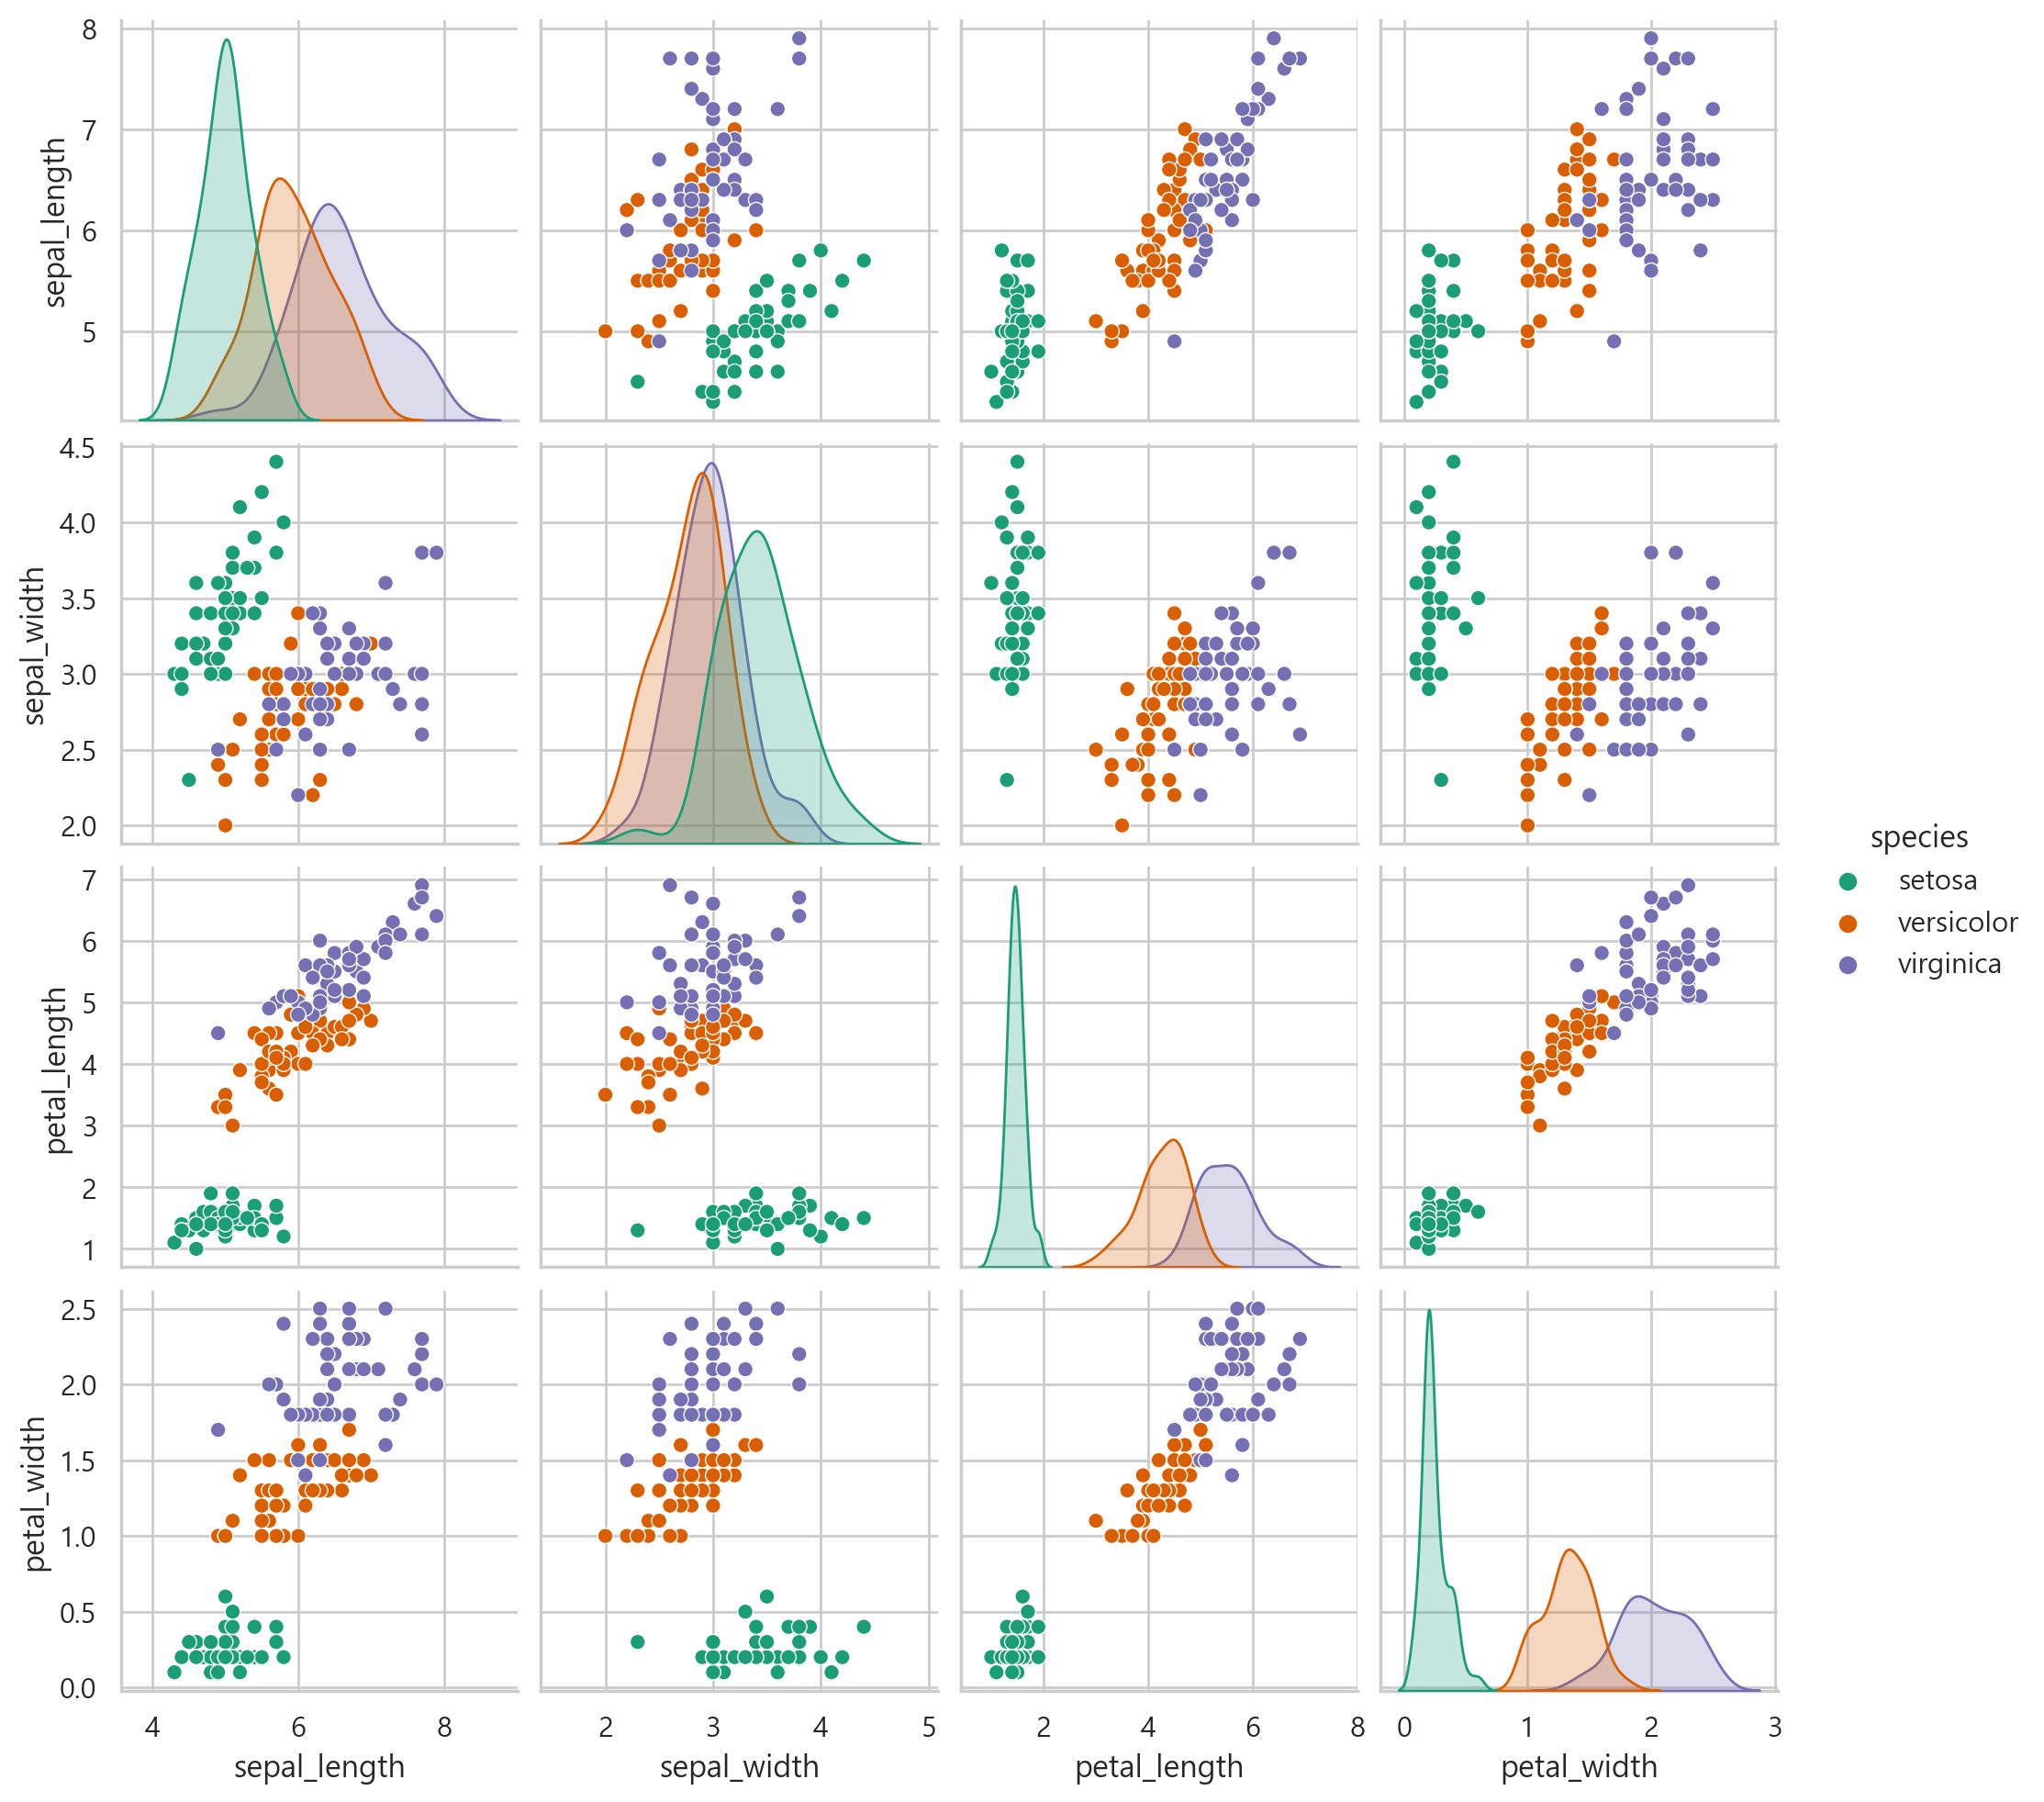

In [118]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도 그래프

In [121]:
import numpy as np
x = np.random.randn(10000) # 평균이 0, 표준편차가 1인 정규분포로 10000개 1차원 배열
x

array([ 0.02506371, -0.94846202,  0.91497306, ...,  0.96682841,
        0.53703956, -0.70145719])

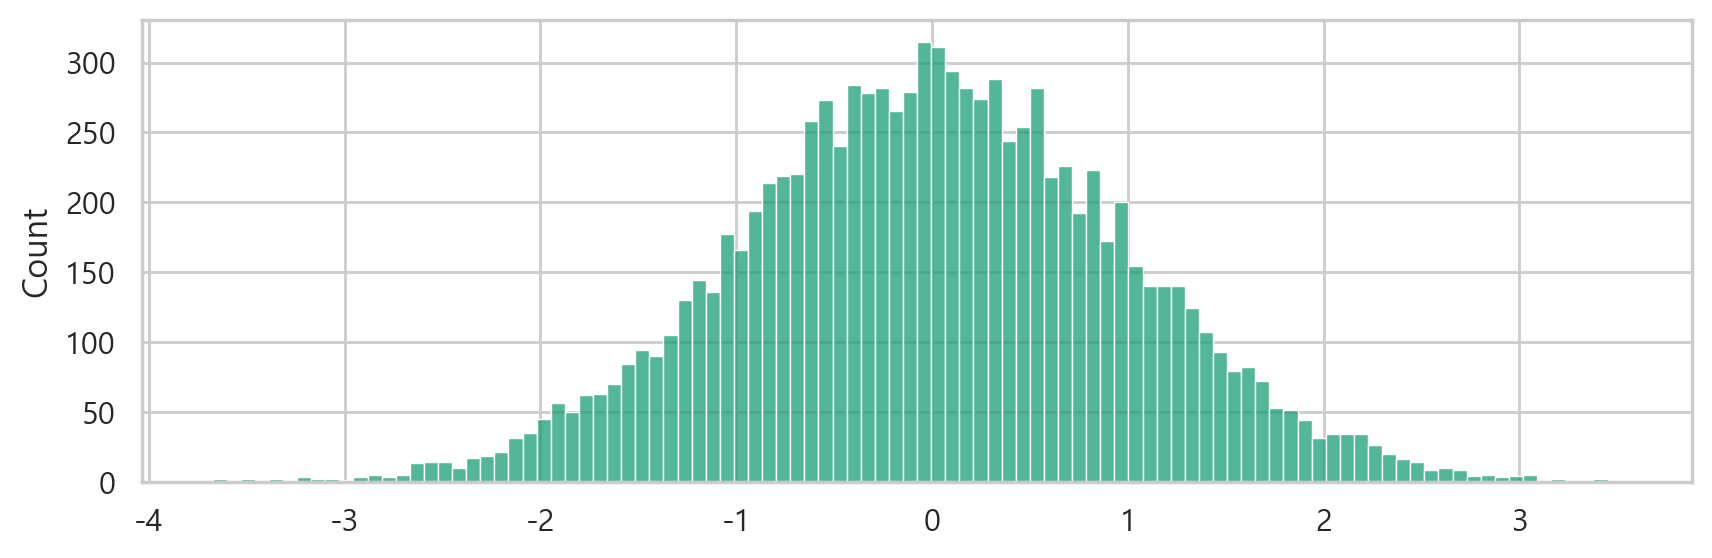

In [124]:
sns.histplot(x, bins=100)
plt.show()

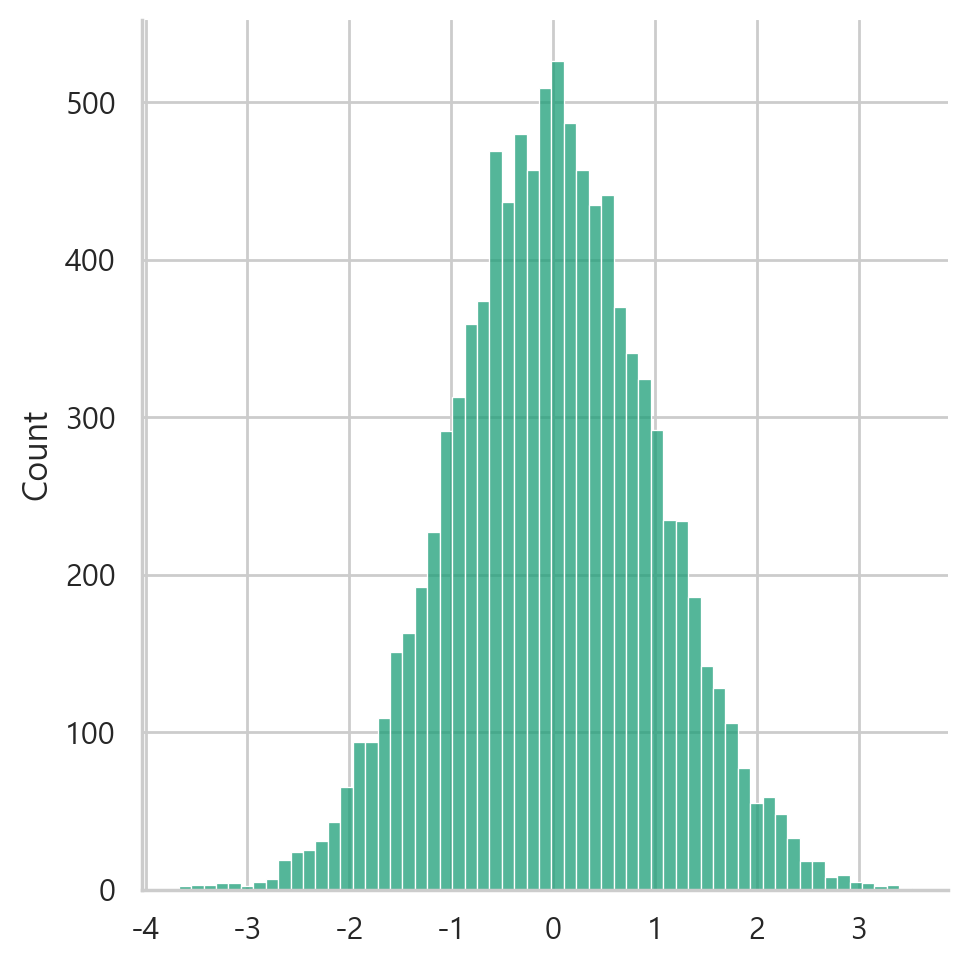

In [125]:
sns.displot(x)

### 5) 회귀 그래프

In [126]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


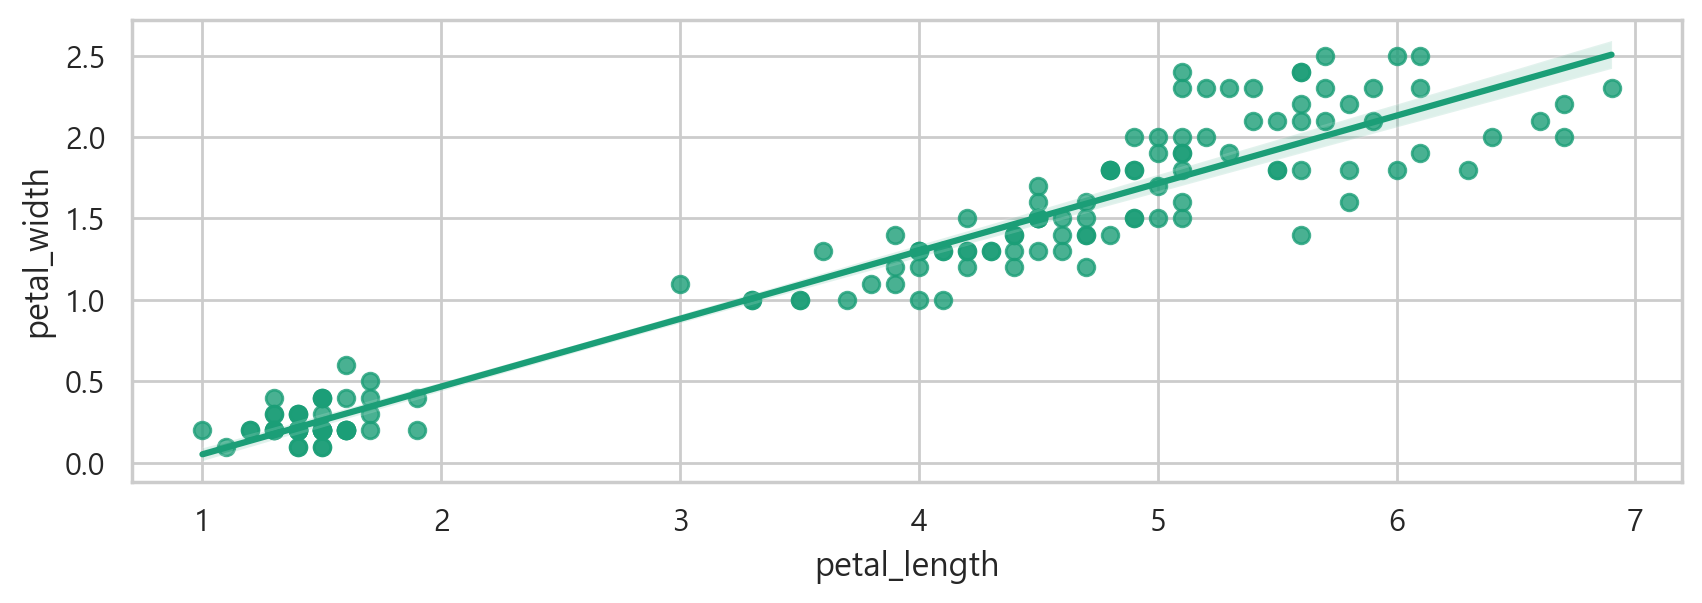

In [129]:
# 회귀 그래프 : regplot(hue 사용 불가), lmplot(hue 사용 가능)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

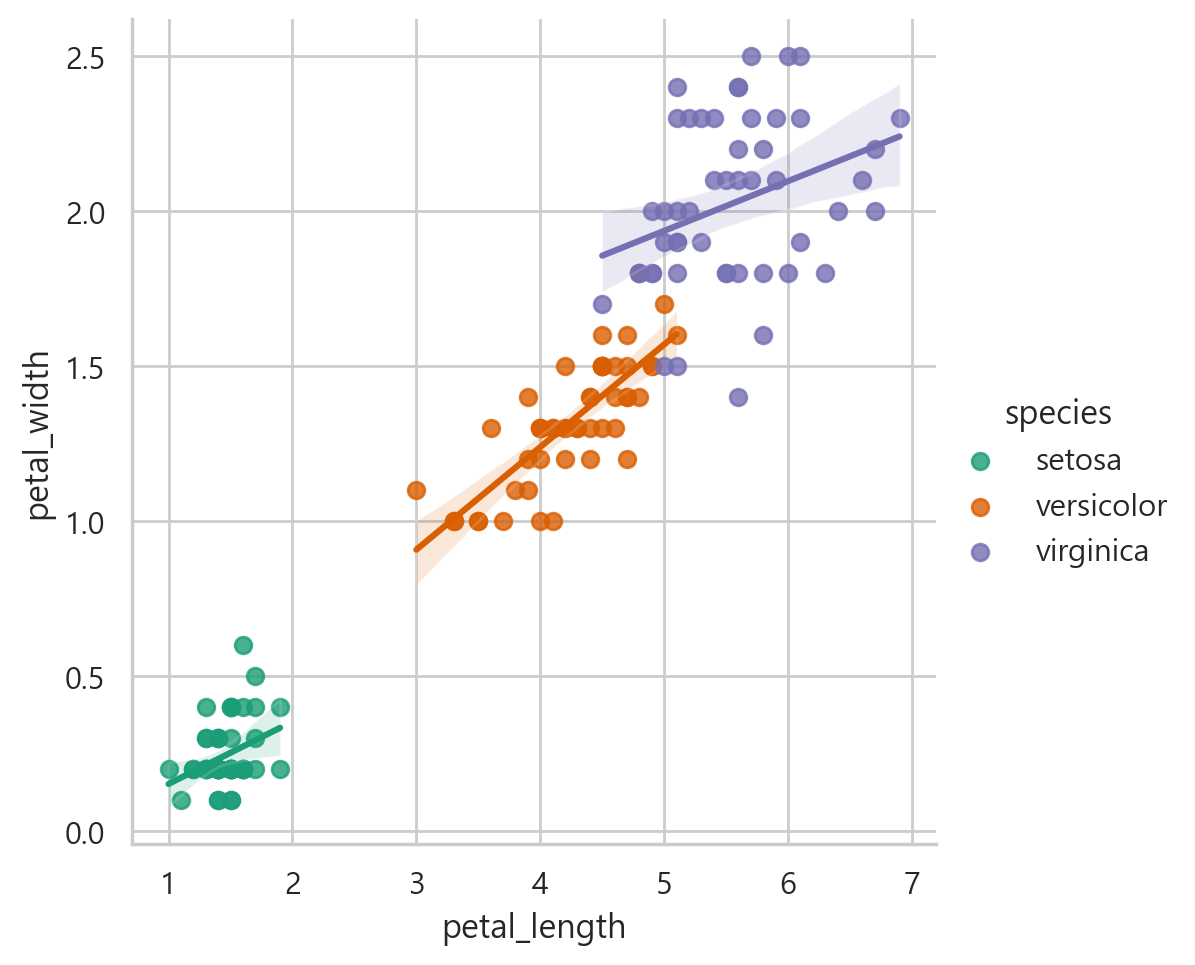

In [131]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width',
           hue='species')
plt.show()

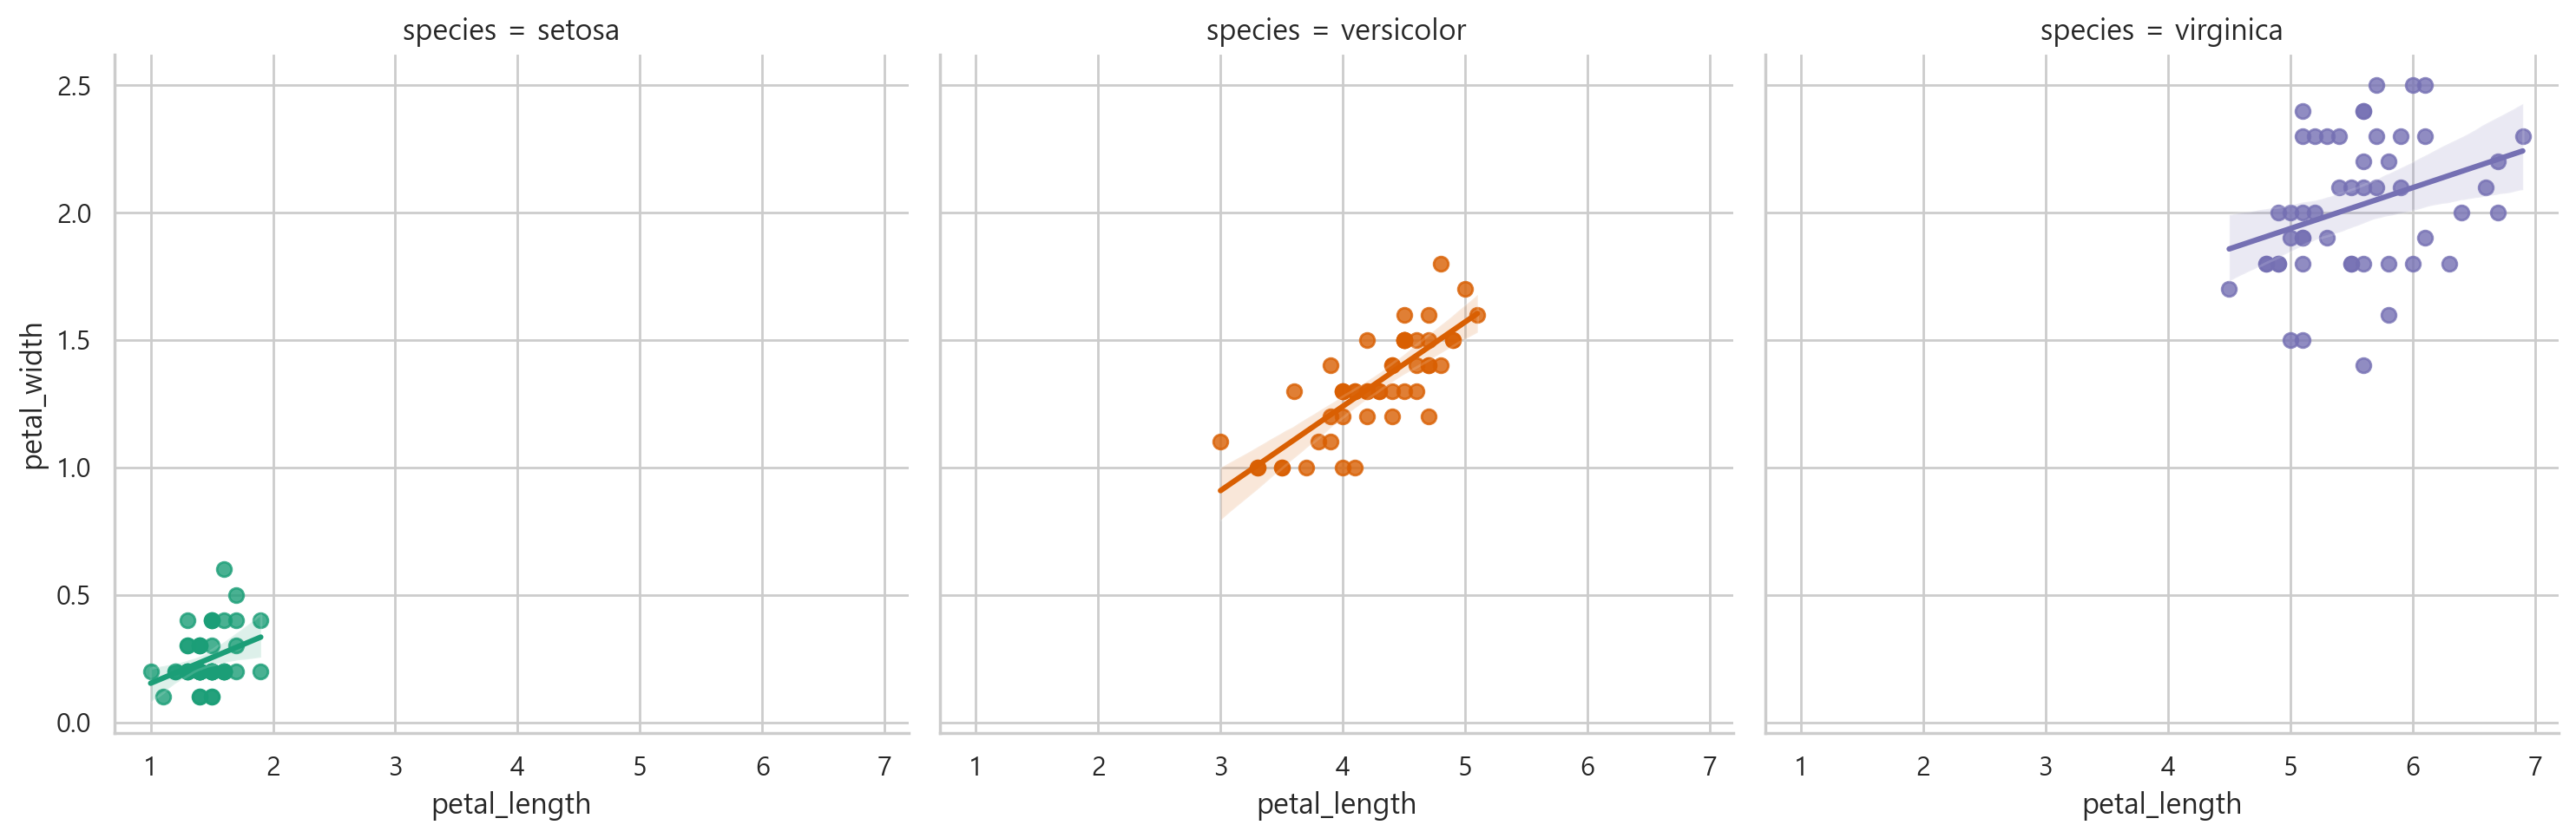

In [132]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width',
           hue='species',
           col='species')
plt.show()

## 2.4 다중그래프를 위한 FacetGrid
- https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples (교안 84page)

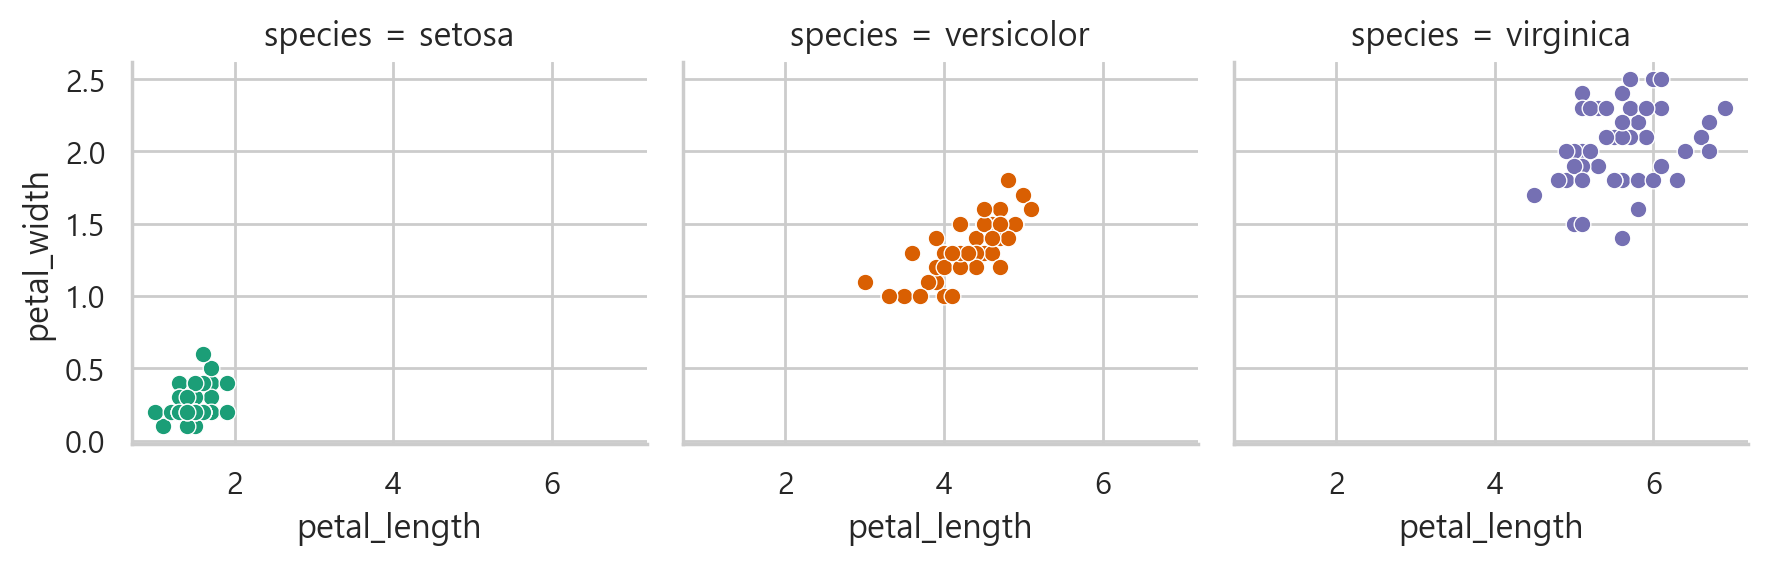

In [133]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

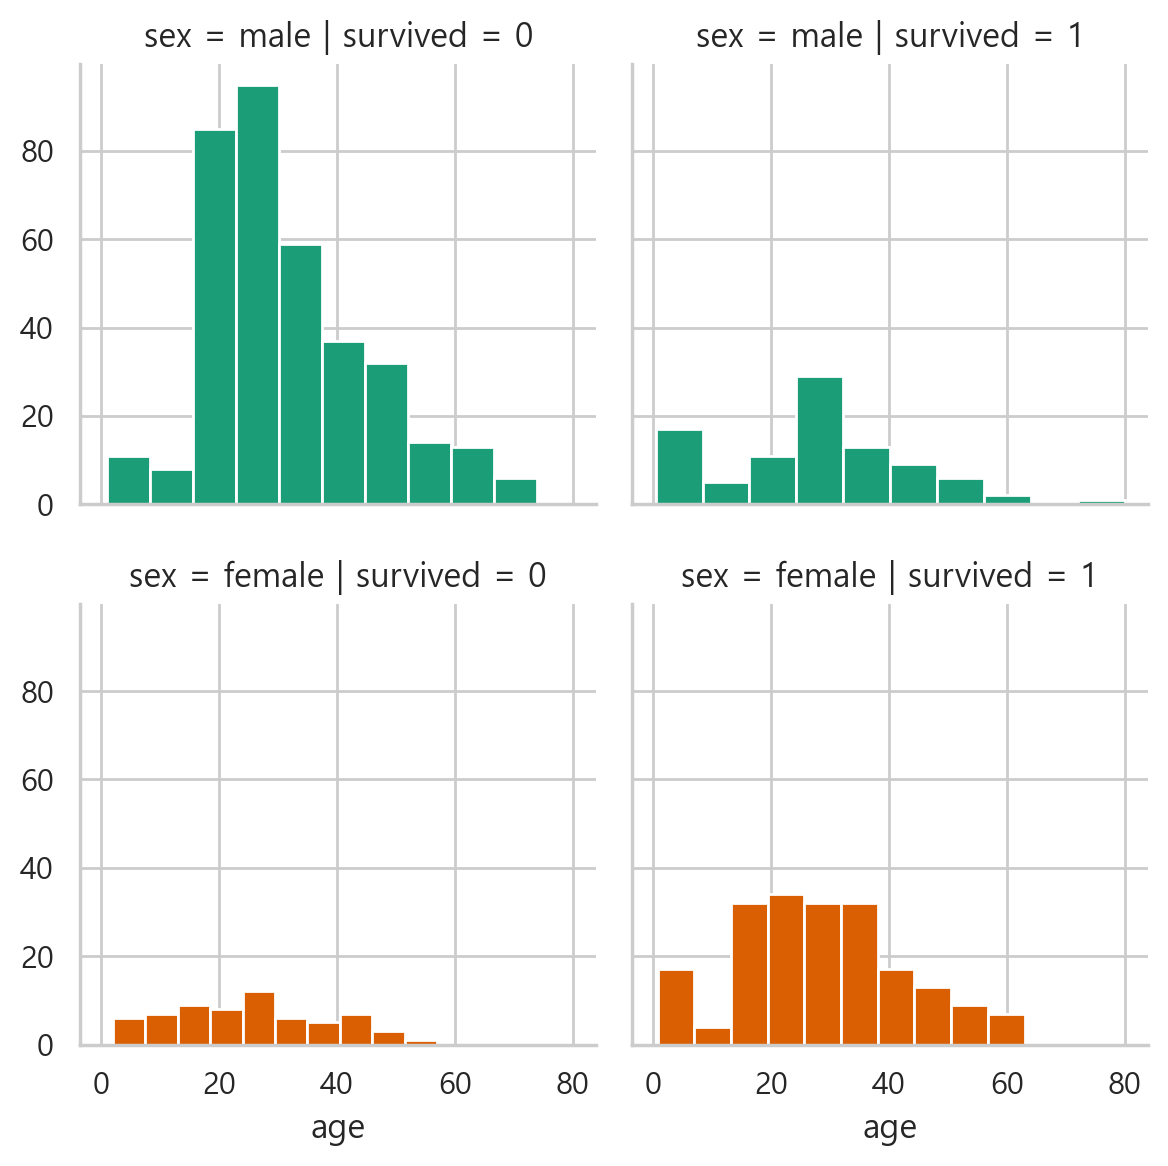

In [136]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(plt.hist, 'age')
plt.show()